# 星火预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

配置一个支持 Python 的环境和相应的 Python 软件包，使得至少可以跑通如下代码：

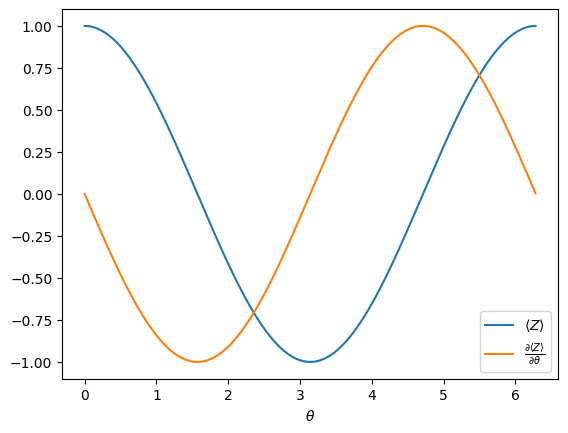

In [5]:
import numpy as np
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning


from matplotlib import pyplot as plt
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


@K.jit
def exp_z(param):
    c = tc.Circuit(1)
    c.rx(0, theta=param)
    return K.real(c.expectation_ps(z=[0]))


grad_z = K.grad(exp_z)

params = K.convert_to_tensor(np.arange(0, 2 * np.pi, 0.01))

plt.plot(params, [exp_z(param) for param in params], label=r"$\langle Z\rangle$")
plt.plot(
    params,
    [grad_z(param) for param in params],
    label=r"$\frac{\partial \langle Z\rangle}{\partial \theta}$",
)
plt.legend()
plt.xlabel(r"$\theta$")
plt.show()

## 2 向量和矩阵

### 2-1 旋转矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

初始向量 v = [1 0]

旋转结果：
旋转   0°:  1.000,  0.000
旋转  30°:  0.866, -0.500
旋转  45°:  0.707, -0.707
旋转  60°:  0.500, -0.866
旋转  90°:  0.000, -1.000
旋转 180°: -1.000, -0.000
旋转 270°: -0.000,  1.000


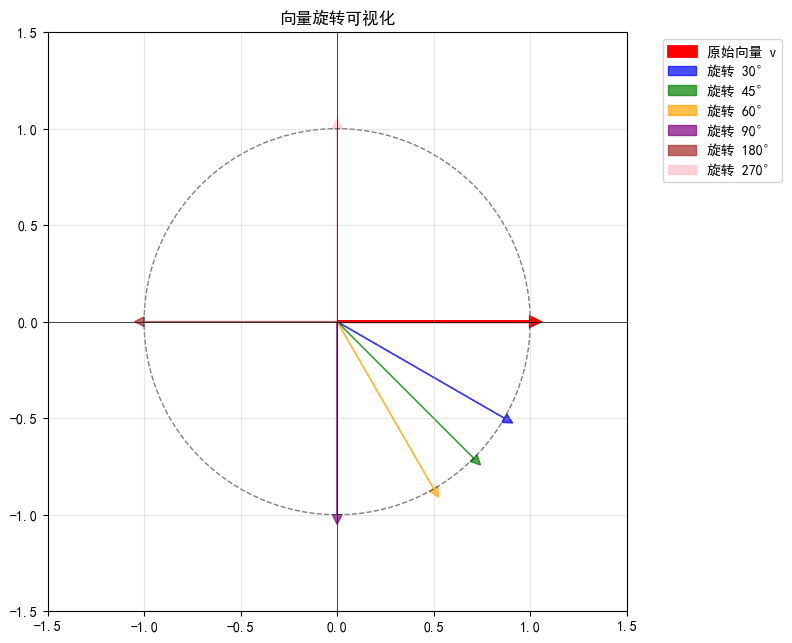

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

v = np.array([1, 0])
print(f"初始向量 v = {v}")

def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

angles = [0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi, 3*np.pi/2]
angle_names = ['0°', '30°', '45°', '60°', '90°', '180°', '270°']

print("\n旋转结果：")
for i, theta in enumerate(angles):
    R = rotation_matrix(theta)
    v_rotated = R @ v
    print(f"旋转 {angle_names[i]:>4}: {v_rotated[0]:6.3f}, {v_rotated[1]:6.3f}")

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, 
          fc='red', ec='red', linewidth=2, label='原始向量 v')

colors = ['blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, theta in enumerate(angles[1:]):
    R = rotation_matrix(theta)
    v_rotated = R @ v
    ax.arrow(0, 0, v_rotated[0], v_rotated[1], 
              head_width=0.05, head_length=0.05, 
              fc=colors[i], ec=colors[i], alpha=0.7,
              label=f'旋转 {angle_names[i+1]}')

circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='--', alpha=0.5)
ax.add_patch(circle)

ax.set_title('向量旋转可视化')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_y$. $\sigma_x, \sigma_y, \sigma_y$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

# Proof: 
Noting that Pauli matrices share the property: $ \sigma_x^2 = \sigma_y^2 = \sigma_z^2 = I$

According to the Taylor series expansion Theorem, 
$$e^{A}= I + \sum_{n=1}^{+\infty} \frac{A^n}{n!}$$

Which means:
\begin{align}
e^{i\theta\hat{P}} &= I + i\theta\hat{P} + \frac{(i\theta\hat{P})^2}{2!} + \frac{(i\theta\hat{P})^3}{3!} + \frac{(i\theta\hat{P})^4}{4!} + \cdots \\
&= I + i\theta\hat{P} + \frac{i^2\theta^2\hat{P}^2}{2!} + \frac{i^3\theta^3\hat{P}^3}{3!} + \frac{i^4\theta^4\hat{P}^4}{4!} + \cdots \\
&= I + i\theta\hat{P} - \frac{\theta^2I}{2!} - \frac{i\theta^3\hat{P}}{3!} + \frac{\theta^4I}{4!} + \cdots \\
&= \left(I - \frac{\theta^2}{2!}I + \frac{\theta^4}{4!}I - \cdots\right) + i\hat{P}\left(\theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \cdots\right) \\
&= \cos(\theta) I + i \sin(\theta) \hat{P}
\end{align}

Therefore, the requirement of the matrix $\hat{P}$ is : $\hat{P}^2 = I $ 

In [5]:
import numpy as np
from scipy.linalg import expm

sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

pauli_matrices = {
    "sigma_x": sigma_x,
    "sigma_y": sigma_y,
    "sigma_z": sigma_z,
}

theta = np.random.uniform(0, 2*np.pi)

for name, P in pauli_matrices.items():
    print(f"当前选择的是: {name}")
    LHS = expm(1j * theta * P)
    LHS = np.round(LHS, 3) 
    print(f"LHS = \n {LHS}")

    RHS = np.cos(theta) * I + 1j * np.sin(theta) * P
    RHS = np.round(RHS, 3)
    print(f"\n RHS = \n {RHS}")

    if np.allclose(LHS, RHS):
        print(f"公式对{name}成立！")
    else:
        print(f"公式对{name}不成立！")

当前选择的是: sigma_x
LHS = 
 [[0.999+0.j    0.   +0.048j]
 [0.   +0.048j 0.999+0.j   ]]

 RHS = 
 [[0.999+0.j    0.   +0.048j]
 [0.   +0.048j 0.999+0.j   ]]
公式对sigma_x成立！
当前选择的是: sigma_y
LHS = 
 [[ 0.999+0.j  0.048+0.j]
 [-0.048+0.j  0.999+0.j]]

 RHS = 
 [[ 0.999+0.j  0.048+0.j]
 [-0.048+0.j  0.999+0.j]]
公式对sigma_y成立！
当前选择的是: sigma_z
LHS = 
 [[0.999+0.048j 0.   +0.j   ]
 [0.   +0.j    0.999-0.048j]]

 RHS = 
 [[0.999+0.048j 0.   +0.j   ]
 [0.   +0.j    0.999-0.048j]]
公式对sigma_z成立！


### 2-3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

# Answer
By 2-2,  $$v(\theta)=cos(\theta/2) v_0 + i sin(\theta/2) \hat{P} v_0 \\ v^\dagger(\theta)= cos(\theta/2) v_0^\dagger - i sin(\theta/2) v_0^\dagger \hat{P}^\dagger = cos(\theta/2) v_0 - i sin(\theta/2) v_0 \hat{P}$$
The second step utilizes the Hermitan property of Pauli matrices. 

Hence 
\begin{align}
v^\dagger \hat{Q} v &= cos^2(\theta/2) v_0 \hat{Q} v_0 + sin^2(\theta/2) \hat{P} v_0 \hat{Q} v_0 \hat{P} + i sin(\theta/2)cos(\theta/2) v_0 (\hat{Q}\hat{P}-\hat{P}\hat{Q}) v_0 \\
&= v_0 \hat{Q} v_0 + i/2 sin(\theta) v_0 [\hat{Q}, \hat{P}] v_0\\
&= v_0 \hat{Q} v_0 + \epsilon_{PQR}  sin(\theta)v_0\hat{R}v_0
\end{align}

Here, $\epsilon$ is the Levi-Civita symbol. $\hat{R}$ is the unselected matrix. The result shows that the expectation floats around $v_0 \hat{Q} v_0$ with amplitude $\epsilon_{PQR}v_0\hat{R}v_0$ as $\theta$ changes.

期望值 <Q>_v(θ) = 0.8660


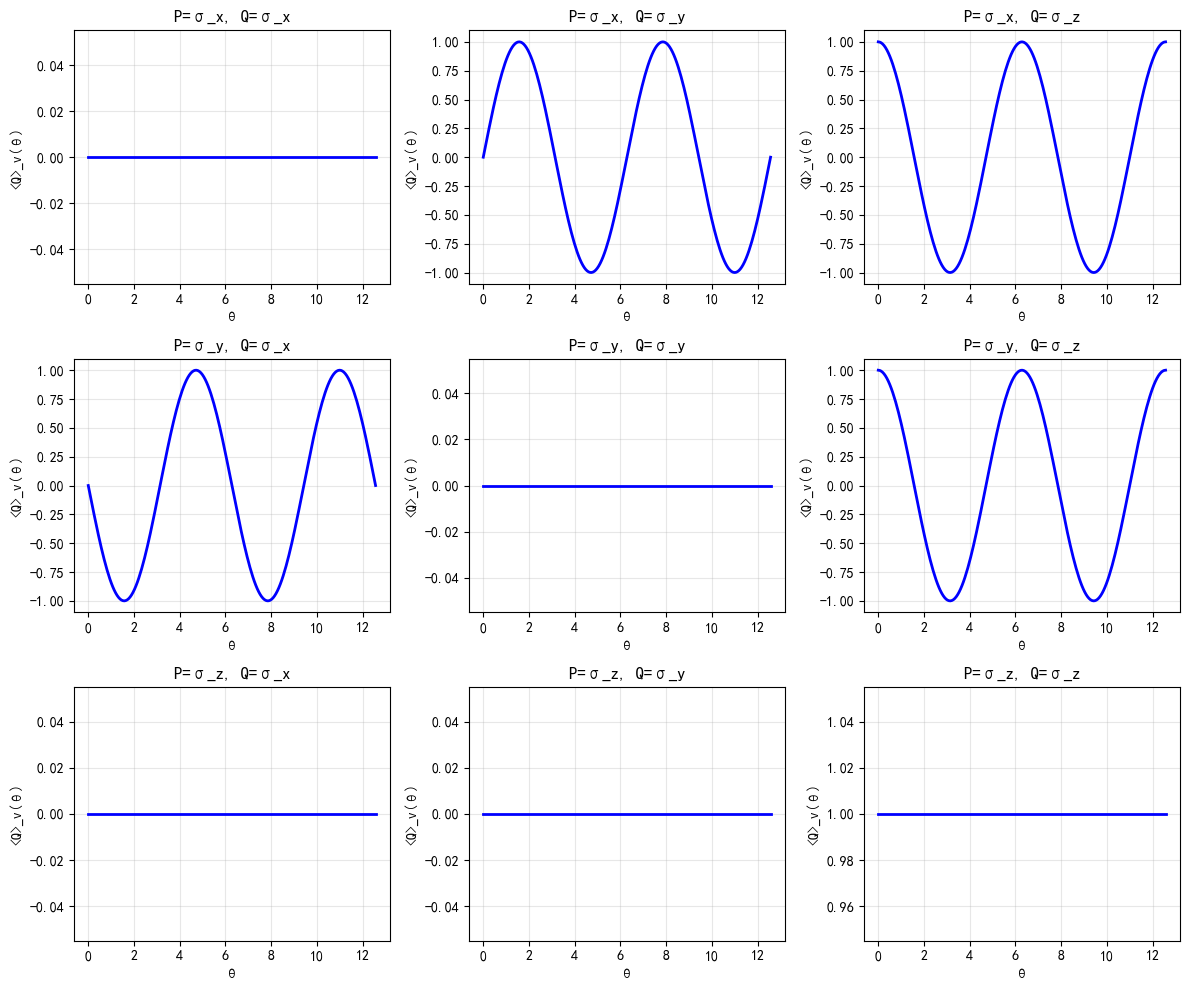

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)
v_0 = np.array([1, 0], dtype=complex)

pauli_list = [sigma_x, sigma_y, sigma_z]

def calculate_expectation_numpy(p_index: int, q_index: int, theta: float) -> float:
    P, Q = pauli_list[p_index], pauli_list[q_index]
    v_theta = expm(1j * theta/2 * P) @ v_0
    return np.real(v_theta.conj() @ Q @ v_theta)

theta_test = np.pi/3
p, q = 0, 1
result = calculate_expectation_numpy(p, q, theta_test)
print(f"期望值 <Q>_v(θ) = {result:.4f}")

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
theta_range = np.linspace(0, 4*np.pi, 200)

pauli_names = ['σ_x', 'σ_y', 'σ_z']
for i in range(3):
    for j in range(3):
        expectations = [calculate_expectation_numpy(i, j, t) for t in theta_range]
        axes[i,j].plot(theta_range, expectations, 'b-', linewidth=2)
        axes[i,j].set_title(f'P={pauli_names[i]}, Q={pauli_names[j]}')
        axes[i,j].set_xlabel('θ')
        axes[i,j].set_ylabel('<Q>_v(θ)')
        axes[i,j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。


=== n = 5 qubit system ===
Added Z_0 term
Added Z_1 term
Added Z_2 term
Added Z_3 term
Added Z_4 term
Added X_0X_1 term
Added X_1X_2 term
Added X_2X_3 term
Added X_3X_4 term
Hamiltonian H dimensions: (32, 32)
Initial state dimensions: (32,)
Expectation value <0...0|H|0...0> = 5.0000
--------------------------------------------------

=== Expectation values vs system size ===
Added Z_0 term
Added Z_1 term
Added X_0X_1 term
n=2: <H> = 2.0000
Added Z_0 term
Added Z_1 term
Added Z_2 term
Added X_0X_1 term
Added X_1X_2 term
n=3: <H> = 3.0000
Added Z_0 term
Added Z_1 term
Added Z_2 term
Added Z_3 term
Added X_0X_1 term
Added X_1X_2 term
Added X_2X_3 term
n=4: <H> = 4.0000
Added Z_0 term
Added Z_1 term
Added Z_2 term
Added Z_3 term
Added Z_4 term
Added X_0X_1 term
Added X_1X_2 term
Added X_2X_3 term
Added X_3X_4 term
n=5: <H> = 5.0000
Added Z_0 term
Added Z_1 term
Added Z_2 term
Added Z_3 term
Added Z_4 term
Added Z_5 term
Added X_0X_1 term
Added X_1X_2 term
Added X_2X_3 term
Added X_3X_4 te

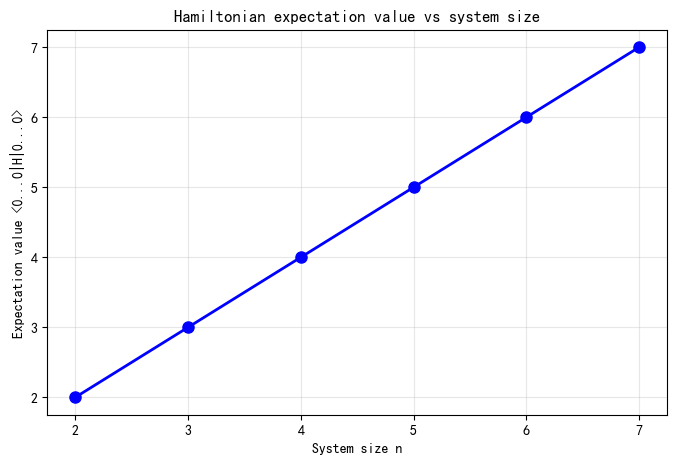


Observation: expectation value grows linearly with slope ~1.00


In [7]:
import numpy as np
from functools import reduce

sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

def tensor_product(*matrices):
    return reduce(np.kron, matrices)

def pauli_string(n, operations):
    matrices = [I] * n
    
    for pos, matrix in operations:
        if 0 <= pos < n:
            matrices[pos] = matrix
    
    return tensor_product(*matrices)

def generate_hamiltonian(n):
    H = np.zeros((2**n, 2**n), dtype=complex)
    
    for i in range(n):
        Z_i = pauli_string(n, [(i, sigma_z)])
        H += Z_i
        print(f"Added Z_{i} term")
    
    for i in range(n-1):
        X_i_X_i1 = pauli_string(n, [(i, sigma_x), (i+1, sigma_x)])
        H += X_i_X_i1
        print(f"Added X_{i}X_{i+1} term")
    
    return H

n = int(input("请输入量子比特数量 n: "))

print(f"\n=== n = {n} qubit system ===")

H = generate_hamiltonian(n)
print(f"Hamiltonian H dimensions: {H.shape}")

psi_0 = np.zeros(2**n, dtype=complex)
psi_0[0] = 1.0
print(f"Initial state dimensions: {psi_0.shape}")

expectation = np.real(psi_0.conj() @ H @ psi_0)
print(f"Expectation value <0...0|H|0...0> = {expectation:.4f}")

print("-" * 50)

import matplotlib.pyplot as plt

n_values = range(2, 8)
expectations = []

print("\n=== Expectation values vs system size ===")
for n in n_values:
    H = generate_hamiltonian(n)
    psi_0 = np.zeros(2**n, dtype=complex)
    psi_0[0] = 1.0
    expectation = np.real(psi_0.conj() @ H @ psi_0)
    expectations.append(expectation)
    print(f"n={n}: <H> = {expectation:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(n_values, expectations, 'bo-', linewidth=2, markersize=8)
plt.xlabel('System size n')
plt.ylabel('Expectation value <0...0|H|0...0>')
plt.title('Hamiltonian expectation value vs system size')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nObservation: expectation value grows linearly with slope ~{(expectations[-1] - expectations[0])/(n_values[-1] - n_values[0]):.2f}")

# Tensor Product Theoretical Analysis

## Hamiltonian Composition Analysis

The given Hamiltonian:
$$H = \sum_{i=0}^{n-1} Z_i + \sum_{i=0}^{n-2} X_i X_{i+1}$$

Where:
- First term $\sum_{i=0}^{n-1} Z_i$ represents $Z$ operators on each qubit
- Second term $\sum_{i=0}^{n-2} X_i X_{i+1}$ represents $XX$ interactions between adjacent qubits

## Expectation Value Calculation

For the initial state $|\psi_0\rangle = |00...0\rangle$:

**First term contribution**:
$$\langle 00...0| Z_i |00...0\rangle = 1 \quad \text{(for all i)}$$

Therefore, the first term contributes a total of $n$.

**Second term contribution**:
$$\langle 00...0| X_i X_{i+1} |00...0\rangle = \langle 00...0| |11...1\rangle_{i,i+1} = 0$$

Because the $X$ operator flips bit states: $X|0\rangle = |1\rangle$.

**Total expectation value**:
$$\langle H \rangle = n + 0 = n$$

This explains why the expectation value grows linearly with $n$!

### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

As discussed above,
$$H = \sum_{i=0}^{n-1} Z_i + \sum_{i=0}^{n-2} X_i X_{i+1}$$
Note that the following relationship holds
$$X_i=|1\rangle_i \langle0|_i+|0\rangle_i \langle1|_i,  \quad Z_i=|0\rangle_i \langle0_i-|1\rangle_i \langle1|_i$$
The Hamiltonian can be further written as 
$$H = \sum_{i=0}^{n-1} (|0\rangle_i \langle0_i-|1\rangle_i \langle1|_i) + \sum_{i=0}^{n-2} [(|1\rangle_i \langle0|_i+|0\rangle_i \langle1|_i)\otimes(|1\rangle_i \langle0|_{i+1}+|0\rangle_i \langle1|_{i+1})]$$

$\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)=\begin{pmatrix}0\\0\\\frac{1}{\sqrt{2}}\\0\\0\\-\frac{1}{\sqrt{2}}\\0\\0\\\end{pmatrix}$

### 2-6 使用Tensorcircuit后端

使用`Tensorcircuit`的`Tensorflow`或`JAX`后端API重写本小节（§2）所有题目

提示：可以使用调用后端`K = tc.set_backend("tensorflow")`，具体使用方法可以参考 1-环境配置 与[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)

In [ ]:
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")

#### 2-2

In [8]:
import numpy as np
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning

import tensorcircuit as tc

print("=== TensorCircuit 后端矩阵指数验证 ===")

sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

pauli_matrices = {
    "sigma_x": {"matrix": sigma_x, "gate": "rx"},
    "sigma_y": {"matrix": sigma_y, "gate": "ry"},
    "sigma_z": {"matrix": sigma_z, "gate": "rz"},
}

theta = np.random.uniform(0, 2*np.pi)
print(f"测试角度 θ = {theta:.4f}\n")

for name, info in pauli_matrices.items():
    P = info["matrix"]
    gate_name = info["gate"]

    print(f"--- 验证 {name} ---")
    
    c = tc.Circuit(1)
    getattr(c, gate_name)(0, theta=-2 * theta)
    lhs = c.matrix()
    
    print("LHS = e^(iθP) (来自 TensorCircuit):")
    print(np.round(lhs, 4))

    rhs = np.cos(theta) * I + 1j * np.sin(theta) * P
    print("\nRHS = cos(θ)I + i*sin(θ)P (欧拉公式):")
    print(np.round(rhs, 4))
    
    is_correct = np.allclose(lhs, rhs, atol=1e-10)
    max_error = np.max(np.abs(lhs - rhs))
    
    if is_correct:
        print(f"✓ 公式对 {name} 成立！")
    else:
        print(f"✗ 公式对 {name} 不成立！")
        
    print(f"  最大误差: {max_error:.2e}")
    print("-" * 30)


=== TensorCircuit 后端矩阵指数验证 ===
测试角度 θ = 5.9482

--- 验证 sigma_x ---
LHS = e^(iθP) (来自 TensorCircuit):
[[0.9444+0.j     0.    -0.3288j]
 [0.    -0.3288j 0.9444+0.j    ]]

RHS = cos(θ)I + i*sin(θ)P (欧拉公式):
[[0.9444+0.j     0.    -0.3288j]
 [0.    -0.3288j 0.9444+0.j    ]]
✓ 公式对 sigma_x 成立！
  最大误差: 1.49e-07
------------------------------
--- 验证 sigma_y ---
LHS = e^(iθP) (来自 TensorCircuit):
[[ 0.9444+0.j -0.3288+0.j]
 [ 0.3288+0.j  0.9444+0.j]]

RHS = cos(θ)I + i*sin(θ)P (欧拉公式):
[[ 0.9444+0.j -0.3288+0.j]
 [ 0.3288+0.j  0.9444+0.j]]
✓ 公式对 sigma_y 成立！
  最大误差: 1.49e-07
------------------------------
--- 验证 sigma_z ---
LHS = e^(iθP) (来自 TensorCircuit):
[[0.9444-0.3288j 0.    +0.j    ]
 [0.    +0.j     0.9444+0.3288j]]

RHS = cos(θ)I + i*sin(θ)P (欧拉公式):
[[0.9444-0.3288j 0.    +0.j    ]
 [0.    +0.j     0.9444+0.3288j]]
✓ 公式对 sigma_z 成立！
  最大误差: 1.60e-07
------------------------------


#### 2-3

=== TensorFlow 方法验证 ===
P=σ_x, Q=σ_x: TensorCircuit=0.000000, NumPy=0.000000, 差异=0.00e+00
P=σ_x, Q=σ_y: TensorCircuit=0.707107, NumPy=0.707107, 差异=5.96e-08
P=σ_x, Q=σ_z: TensorCircuit=0.707107, NumPy=0.707107, 差异=5.96e-08
P=σ_y, Q=σ_x: TensorCircuit=-0.707107, NumPy=-0.707107, 差异=5.96e-08
P=σ_y, Q=σ_y: TensorCircuit=0.000000, NumPy=0.000000, 差异=0.00e+00
P=σ_y, Q=σ_z: TensorCircuit=0.707107, NumPy=0.707107, 差异=5.96e-08
P=σ_z, Q=σ_x: TensorCircuit=0.000000, NumPy=0.000000, 差异=0.00e+00
P=σ_z, Q=σ_y: TensorCircuit=0.000000, NumPy=0.000000, 差异=0.00e+00
P=σ_z, Q=σ_z: TensorCircuit=1.000000, NumPy=1.000000, 差异=0.00e+00

=== 生成期望值变化曲线 ===


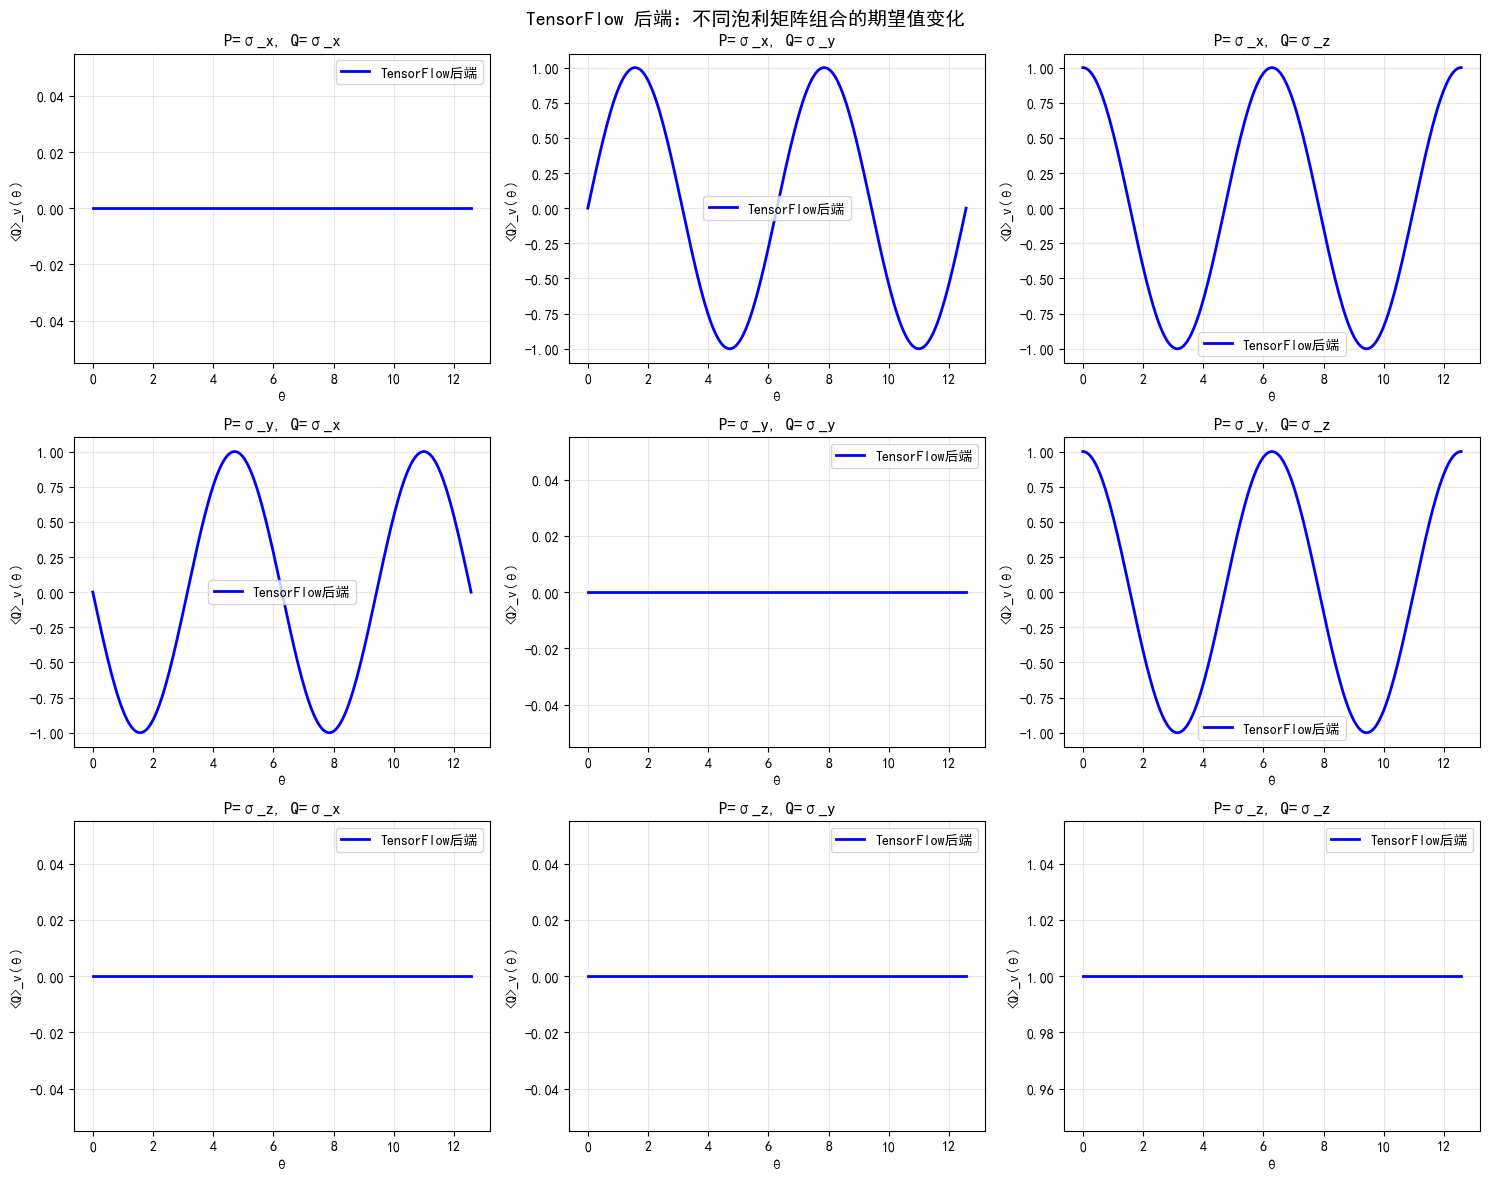

In [9]:
import matplotlib.pyplot as plt
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


p_gate_map = {0: "rx", 1: "ry", 2: "rz"}

q_measure_map = {0: {"x": [0]}, 1: {"y": [0]}, 2: {"z": [0]}}

def calculate_expectation_tensorflow(p_index: int, q_index: int, theta: float) -> float:
   
    c = tc.Circuit(1)
    gate = p_gate_map[p_index]
    getattr(c, gate)(0, theta=-theta)
    
    measure_setting = q_measure_map[q_index]
    expectation = c.expectation_ps(**measure_setting)
    
    return K.real(expectation)

from scipy.linalg import expm
sigma_x_np = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y_np = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z_np = np.array([[1, 0], [0, -1]], dtype=complex)
v_0 = np.array([1, 0], dtype=complex)
pauli_list_np = [sigma_x_np, sigma_y_np, sigma_z_np]

def calculate_expectation_numpy_ref(p_index: int, q_index: int, theta: float) -> float:
    P, Q = pauli_list_np[p_index], pauli_list_np[q_index]
    v_theta = expm(1j * theta / 2 * P) @ v_0
    return np.real(v_theta.conj() @ Q @ v_theta)

print("=== TensorFlow 方法验证 ===")
theta_test = np.pi/4
pauli_names = ['σ_x', 'σ_y', 'σ_z']

for p in range(3):
    for q in range(3):
        tc_result = calculate_expectation_tensorflow(p, q, theta_test)
        np_result = calculate_expectation_numpy_ref(p, q, theta_test)
        print(f"P={pauli_names[p]}, Q={pauli_names[q]}: "
              f"TensorCircuit={tc_result:.6f}, NumPy={np_result:.6f}, "
              f"差异={abs(tc_result-np_result):.2e}")

print("\n=== 生成期望值变化曲线 ===")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
theta_range = np.linspace(0, 4*np.pi, 200)

for i in range(3):
    for j in range(3):
        expectations = [round(float(calculate_expectation_tensorflow(i, j, float(theta_val))), 4) 
                       for theta_val in theta_range]
        
        # 绘制曲线
        axes[i,j].plot(theta_range, expectations, 'b-', linewidth=2, label='TensorFlow后端')
        axes[i,j].set_title(f'P={pauli_names[i]}, Q={pauli_names[j]}', fontsize=12)
        axes[i,j].set_xlabel('θ')
        axes[i,j].set_ylabel('<Q>_v(θ)')
        axes[i,j].grid(True, alpha=0.3)
        axes[i,j].legend()

plt.suptitle('TensorFlow 后端：不同泡利矩阵组合的期望值变化', fontsize=14)
plt.tight_layout()
plt.show()


#### 2-4

=== TensorFlow后端：Hamiltonian期望值计算 ===

n = 5 量子比特系统
TensorCircuit期望值: 5.0000
理论期望值: 5
误差: 0.000000

=== 期望值随系统大小变化 ===
n=1: TensorCircuit=1.0000, 理论值=1
n=2: TensorCircuit=2.0000, 理论值=2
n=3: TensorCircuit=3.0000, 理论值=3
n=4: TensorCircuit=4.0000, 理论值=4
n=5: TensorCircuit=5.0000, 理论值=5
n=6: TensorCircuit=6.0000, 理论值=6
n=7: TensorCircuit=7.0000, 理论值=7


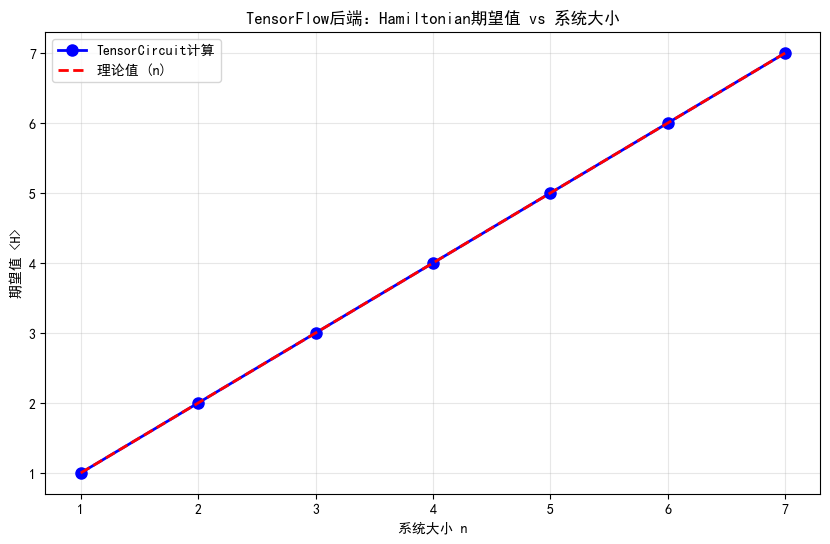


观察：期望值随n线性增长，斜率 ≈ 1.000


In [10]:
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt

K = tc.set_backend("tensorflow")

# 定义泡利矩阵
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

def generate_hamiltonian_tc(n):
    def hamiltonian_expectation(params=None):
        c = tc.Circuit(n)
        expectation = 0.0
        
        for i in range(n):
            z_exp = c.expectation_ps(z=[i])
            expectation += K.real(z_exp)
        
        for i in range(n-1):
            xx_exp = c.expectation_ps(x=[i, i+1])
            expectation += K.real(xx_exp)
            
        return expectation
    
    return hamiltonian_expectation

print("=== TensorFlow后端：Hamiltonian期望值计算 ===")

n_test = int(input("请输入量子比特数量 n: "))

ham_func = generate_hamiltonian_tc(n_test)
expectation_tc = ham_func()

print(f"\nn = {n_test} 量子比特系统")
print(f"TensorCircuit期望值: {float(expectation_tc):.4f}")

# 理论值验证
theoretical = n_test  # Z项贡献n，XX项贡献0
print(f"理论期望值: {theoretical}")
print(f"误差: {abs(float(expectation_tc) - theoretical):.6f}")

# 可视化不同系统大小的期望值
print("\n=== 期望值随系统大小变化 ===")
n_values = range(1, 8)
expectations_tc = []
expectations_theory = []

for n in n_values:
    ham_func = generate_hamiltonian_tc(n)
    exp_val = float(ham_func())
    expectations_tc.append(exp_val)
    expectations_theory.append(n)
    print(f"n={n}: TensorCircuit={exp_val:.4f}, 理论值={n}")

# 绘图比较
plt.figure(figsize=(10, 6))
plt.plot(n_values, expectations_tc, 'bo-', linewidth=2, markersize=8, label='TensorCircuit计算')
plt.plot(n_values, expectations_theory, 'r--', linewidth=2, label='理论值 (n)')
plt.xlabel('系统大小 n')
plt.ylabel('期望值 <H>')
plt.title('TensorFlow后端：Hamiltonian期望值 vs 系统大小')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 验证线性关系
slope = (expectations_tc[-1] - expectations_tc[0]) / (n_values[-1] - n_values[0])
print(f"\n观察：期望值随n线性增长，斜率 ≈ {slope:.3f}")


## 3 导数与梯度下降

### 3-1 数值微分

给定任意计算机函数 ``f``， 其输出是一个数值，输入是一个向量，实现一个函数来计算 ``f`` 关于输入向量各分量的导数。这里可以采用数值差分的方式近似实现，也即 $$(f(x+\delta)-f(x))/\delta$$

In [ ]:
def numerical_gradient(f, x, delta=1e-7):
    x = np.asarray(x, dtype=float)
    grad = np.zeros_like(x)
    
    fx = f(x)
    for i in range(len(x)):
        x_plus_delta = x.copy()
        x_plus_delta[i] += delta
        fx_plus_delta = f(x_plus_delta)
        grad[i] = (fx_plus_delta - fx) / delta
        
    return grad


### 3-2 三角函数数值微分

若上述黑盒函数 $f=A\sin(x + B)+C$，通过解析推导找到是否存在严格的数值差分和解析导数相同，也即 $$f'(x) = (f(x+\delta)-f(x-\delta))/\tau$$ 对应的 $\delta, \tau$， 这一方法被称为参数平移。

### Theorical Analysis

\begin{align}
f'(x) &= (f(x+\delta)-f(x-\delta))/\tau\\
&= A(\sin(x+B+\delta)-\sin(x+B-\delta))/\tau\\
&=\frac{2A}{\tau}\cos(x+B)\sin(\delta)\\
&=\frac{2\sin(\delta)}{\tau}f'(x)
\end{align}

Hence, $\tau=2\sin(\delta)$ exists. 

Let $\delta=\frac{\pi}{2}$, we get an interesting result:
$$f'(x)=\frac{f(x+\frac{\pi}{2})-f(x-\frac{\pi}{2})}{2}$$

### 3-3 单比特参数平移

若 $f= \langle 0\vert e^{-i\theta/2\hat{P_1}}P_2e^{i\theta/2\hat{P_1}}\vert 0\rangle$，其中$\hat{P_1}, \hat{P_2}$均为泡利矩阵。尝试用数值微分或参数平移的办法估算 f 对 $\theta$ 的导数。此时参数平移法给出的导数是否正确，为什么？

$f(\theta)$ 是否有周期性？请通过数值观察和理论推导，给出 $f(\theta)$ 化简的解析表达式。

### Theorical Analysis

\begin{align}
f&= \langle 0\vert e^{-i\theta/2\hat{P_1}}\hat{P_2}e^{i\theta/2\hat{P_1}}\vert 0\rangle\\
&= \langle 0\vert (\cos(\theta/2)I-i sin(\theta/2)\hat{P_1})\hat{P_2}(\cos(\theta/2)I-i sin(\theta/2)\hat{P_1})\vert 0\rangle
\end{align}

Same as the processing method in 2-3, we have:
\begin{align}
f&= \langle 0\vert \hat{P_2}+ \epsilon_{123}  sin(\theta)\hat{P_3}\vert 0\rangle
\end{align}

Here, $\epsilon$ is the Levi-Civita symbol.

Noting that $\langle 0\vert\sigma_x\vert 0\rangle=\langle 0\vert\sigma_y\vert 0\rangle=0$, $\langle 0\vert\sigma_z\vert 0\rangle=1$, we can further simplify the expression: 
\begin{align}
f&= \delta_{2z}+ \epsilon_{123}\delta_{3z}  sin(\theta)
\end{align}

Here, $\delta$ is the Kronecker expression. The final expreesion implies that f is either a constant or a constant with the oscillation term. By 3-2, the parameter shift method is available. 

测试角度 θ = 1.0472 = π/3



测试角度 θ = 1.0472 = π/3



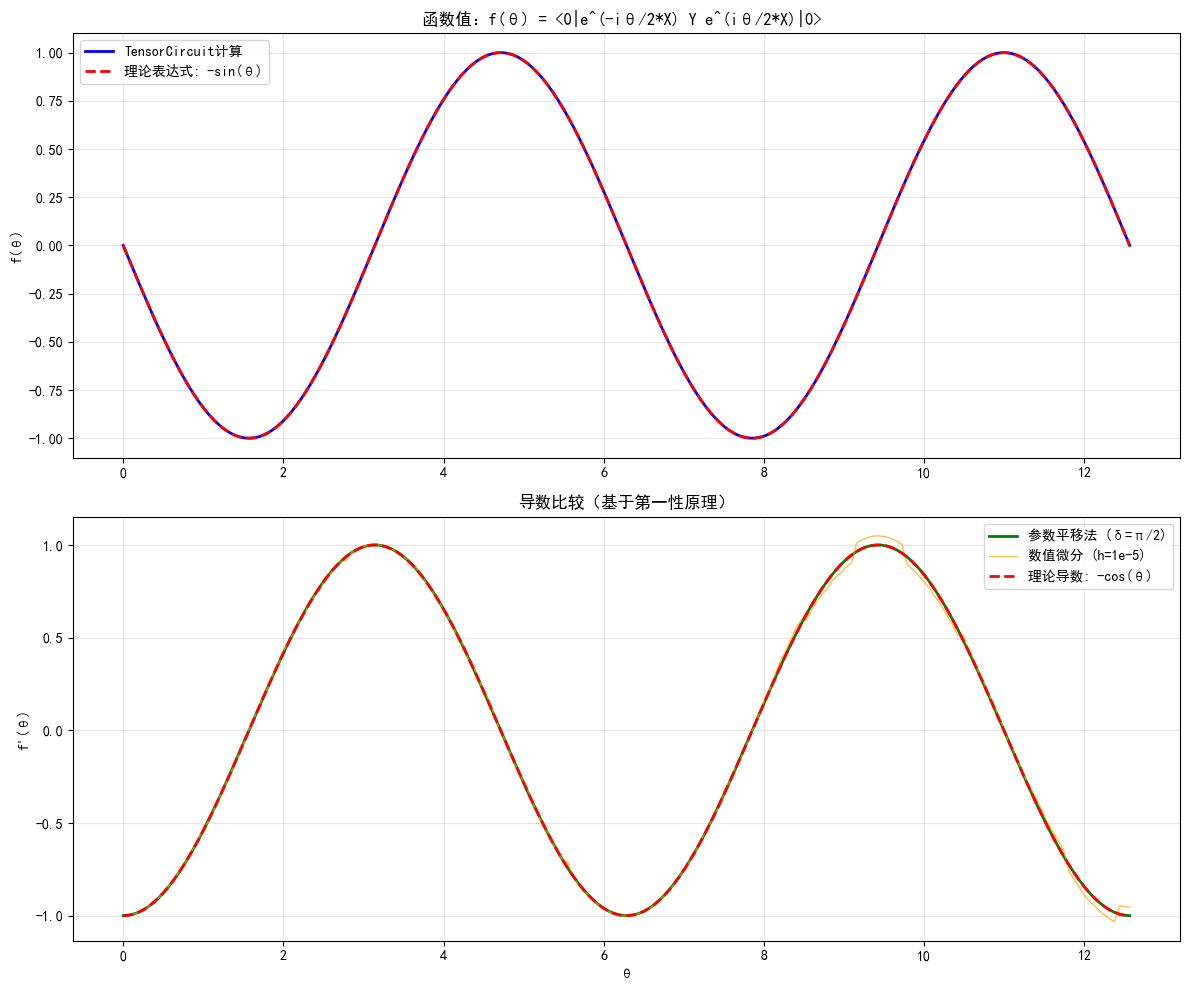

In [79]:
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt

K = tc.set_backend("tensorflow")

pauli_combinations = [
    ("X", "X"), ("X", "Y"), ("X", "Z"),
    ("Y", "X"), ("Y", "Y"), ("Y", "Z"), 
    ("Z", "X"), ("Z", "Y"), ("Z", "Z")
]

def f_function_tf(theta, p1_name, p2_name):

    c = tc.Circuit(1)
    
    if p1_name == "X":
        c.rx(0, theta=theta)
    elif p1_name == "Y":
        c.ry(0, theta=theta) 
    elif p1_name == "Z":
        c.rz(0, theta=theta)
    
    if p2_name == "X":
        expectation = c.expectation_ps(x=[0])
    elif p2_name == "Y":
        expectation = c.expectation_ps(y=[0])
    elif p2_name == "Z":
        expectation = c.expectation_ps(z=[0])
    
    return K.real(expectation)

def parameter_shift_tf(theta, p1_name, p2_name, delta=np.pi/2):
    
    tau = 2 * np.sin(delta)
    f_plus = f_function_tf(theta + delta, p1_name, p2_name)
    f_minus = f_function_tf(theta - delta, p1_name, p2_name)
    return (f_plus - f_minus) / tau

def numerical_derivative(theta, p1_name, p2_name, h=1e-5):
    
    f_plus = f_function_tf(theta + h, p1_name, p2_name)
    f_current = f_function_tf(theta, p1_name, p2_name)
    return (f_plus - f_current) / h

def analyze_pauli_commutators():
    pauli_index = {"X": 0, "Y": 1, "Z": 2}
    
    levi_civita = {}
    # 定义所有非零的Levi-Civita符号
    levi_civita[(0,1,2)] = 1   # ε_xyz = 1
    levi_civita[(1,2,0)] = 1   # ε_yzx = 1  
    levi_civita[(2,0,1)] = 1   # ε_zxy = 1
    levi_civita[(0,2,1)] = -1  # ε_xzy = -1
    levi_civita[(1,0,2)] = -1  # ε_yxz = -1
    levi_civita[(2,1,0)] = -1  # ε_zyx = -1
    
    return pauli_index, levi_civita

def theoretical_f_direct(theta, p1_name, p2_name):
    """基于Baker-Campbell-Hausdorff公式的直接理论计算"""
    pauli_index, levi_civita = analyze_pauli_commutators()
    
    # 计算<0|P2|0>
    p2_expectation = 1.0 if p2_name == "Z" else 0.0
    
    # 寻找对易关系 [P2, P1] = 2i * ε_{P2,P1,Pk} * Pk
    i = pauli_index[p2_name]  # P2对应的索引
    j = pauli_index[p1_name]  # P1对应的索引
    
    oscillation_amplitude = 0.0
    for k in range(3):
        epsilon_ijk = levi_civita.get((i,j,k), 0)
        if epsilon_ijk != 0:
            # 找到第三个泡利矩阵Pk
            pk_name = ["X", "Y", "Z"][k]
            pk_expectation = 1.0 if pk_name == "Z" else 0.0
            oscillation_amplitude = epsilon_ijk * pk_expectation
            break
    
    result = p2_expectation * np.cos(theta) + oscillation_amplitude * np.sin(theta)
    
    return result

def theoretical_derivative_direct(theta, p1_name, p2_name):
    pauli_index, levi_civita = analyze_pauli_commutators()
    
    p2_expectation = 1.0 if p2_name == "Z" else 0.0
    
    i = pauli_index[p2_name]
    j = pauli_index[p1_name]
    
    oscillation_amplitude = 0.0
    for k in range(3):
        epsilon_ijk = levi_civita.get((i,j,k), 0)
        if epsilon_ijk != 0:
            pk_name = ["X", "Y", "Z"][k]
            pk_expectation = 1.0 if pk_name == "Z" else 0.0
            oscillation_amplitude = epsilon_ijk * pk_expectation
            break
    
    # 导数：d/dθ[A*cos(θ) - B*sin(θ)] = -A*sin(θ) - B*cos(θ)
    derivative = -p2_expectation * np.sin(theta) + oscillation_amplitude * np.cos(theta)
    
    return derivative

def theoretical_f(theta, p1_name, p2_name):
    """使用第一性原理直接计算理论值"""
    return theoretical_f_direct(theta, p1_name, p2_name)

def theoretical_derivative(theta, p1_name, p2_name):
    """使用第一性原理直接计算理论导数"""
    return theoretical_derivative_direct(theta, p1_name, p2_name)

test_theta = np.pi/3
print(f"测试角度 θ = {test_theta:.4f} = π/3\n")

pauli_index, levi_civita = analyze_pauli_commutators()



theta_range = np.linspace(0, 4*np.pi, 200)
f_values = [float(f_function_tf(t, "X", "Y")) for t in theta_range]
param_shift_derivs = [float(parameter_shift_tf(t, "X", "Y")) for t in theta_range]
numerical_derivs = [float(numerical_derivative(t, "X", "Y")) for t in theta_range]
theoretical_values = [theoretical_f_direct(t, "X", "Y") for t in theta_range]
theoretical_derivs = [theoretical_derivative_direct(t, "X", "Y") for t in theta_range]

# 可视化
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 函数值比较
ax1.plot(theta_range, f_values, 'b-', linewidth=2, label='TensorCircuit计算')
ax1.plot(theta_range, theoretical_values, 'r--', linewidth=2, label='理论表达式: -sin(θ)')
ax1.set_ylabel('f(θ)')
ax1.set_title('函数值：f(θ) = <0|e^(-iθ/2*X) Y e^(iθ/2*X)|0> ')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 导数比较
ax2.plot(theta_range, param_shift_derivs, 'g-', linewidth=2, label="参数平移法 (δ=π/2)")
ax2.plot(theta_range, numerical_derivs, 'orange', linewidth=1, alpha=0.7, label="数值微分 (h=1e-5)")
ax2.plot(theta_range, theoretical_derivs, 'r--', linewidth=2, label="理论导数: -cos(θ)")
ax2.set_xlabel('θ')
ax2.set_ylabel("f'(θ)")
ax2.set_title('导数比较（基于第一性原理）')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()




### 3-4 梯度下降

梯度下降是优化函数的常见方法。利用前边我们已知的导数求解方案，结合梯度下降的循环并对1.1给出的代码分析，尝试编程（使用`Tensorflow`后端）寻找 1.3.3 中函数 $f$ 的最小值。

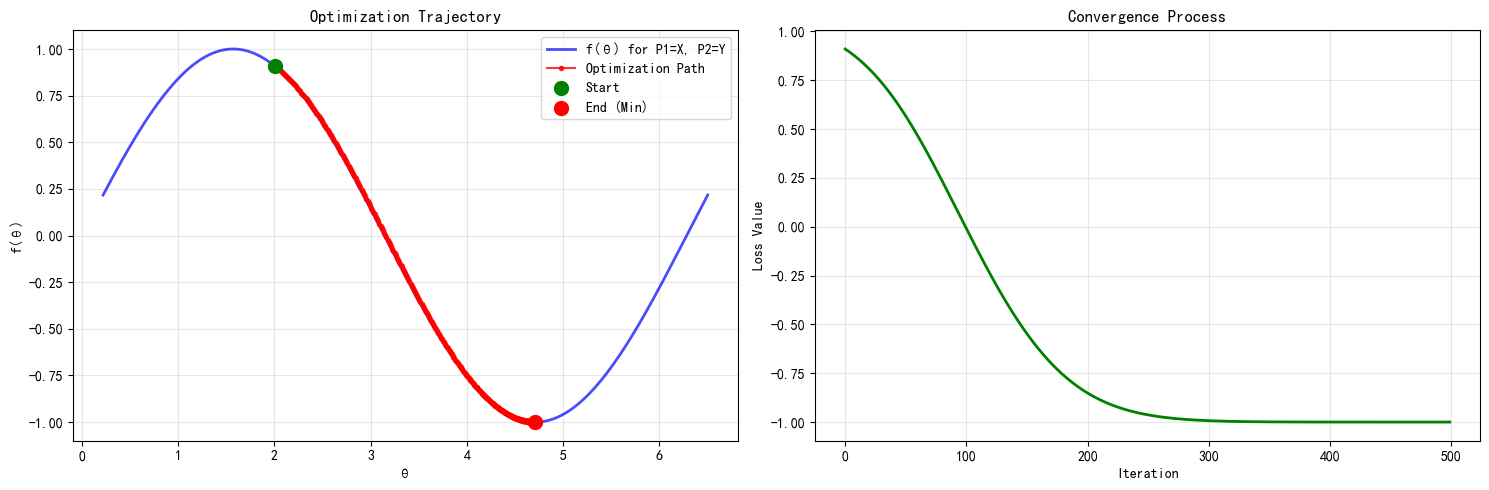

最优角度: 4.7110
最小值: -0.999999
理论最小值: -1.0 (当P1≠P2时)


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import tensorcircuit as tc
import tensorflow as tf
K = tc.set_backend("tensorflow")


def quantum_gradient_descent_with_plot(p1_idx, p2_idx, initial_theta=1.0, learning_rate=0.05, steps=100):
    pauli_names = ['X', 'Y', 'Z']
    gate_map = {0: "rx", 1: "ry", 2: "rz"}
    measure_map = {0: {"x": [0]}, 1: {"y": [0]}, 2: {"z": [0]}}
    @K.jit
    def objective(theta):
        c = tc.Circuit(1)
        getattr(c, gate_map[p1_idx])(0, theta=-theta)
        return K.real(c.expectation_ps(**measure_map[p2_idx]))
    
    theta = tf.Variable(initial_theta, dtype=tf.float32)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    history = {"theta": [], "loss": []}
    
    for step in range(steps):
        with tf.GradientTape() as tape:
            loss = objective(theta)
        gradients = tape.gradient(loss, [theta])
        optimizer.apply_gradients(zip(gradients, [theta]))
        history["theta"].append(float(theta.numpy()))
        history["loss"].append(float(loss.numpy()))
    
    # 可视化
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 左图：函数曲线和优化路径
    center = (history["theta"][0] + history["theta"][-1]) / 2
    theta_plot = np.linspace(center - np.pi, center + np.pi, 200)
    f_plot = [float(objective(t).numpy()) for t in theta_plot]
    
    ax1.plot(theta_plot, f_plot, 'b-', linewidth=2, alpha=0.7, 
             label=f'f(θ) for P1={pauli_names[p1_idx]}, P2={pauli_names[p2_idx]}')
    ax1.plot(history["theta"], history["loss"], 'ro-', markersize=3, alpha=0.8, 
             label='Optimization Path')
    ax1.scatter(history["theta"][0], history["loss"][0], color='green', s=100, 
                label='Start', zorder=5)
    ax1.scatter(history["theta"][-1], history["loss"][-1], color='red', s=100, 
                label='End (Min)', zorder=5)
    ax1.set_xlabel('θ')
    ax1.set_ylabel('f(θ)')
    ax1.set_title('Optimization Trajectory')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 右图：收敛过程
    ax2.plot(range(steps), history["loss"], 'g-', linewidth=2)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss Value')
    ax2.set_title('Convergence Process')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return float(theta.numpy()), float(loss.numpy()), history

optimal_theta, min_value, history = quantum_gradient_descent_with_plot(
    p1_idx=0, p2_idx=1,  
    initial_theta=2.0, 
    learning_rate=0.01, 
    steps=500
)

print(f"最优角度: {optimal_theta:.4f}")
print(f"最小值: {min_value:.6f}")
print(f"理论最小值: -1.0 (当P1≠P2时)")

## 4 测量

### 4-1 线路期望计算

给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

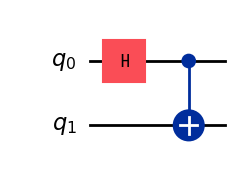

In [27]:
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw(output="mpl")

### Theorical Analysis

\begin{align}
\psi=\hat{C_x}\hat{H}_0|00\rangle=\hat{C_x}\frac{1}{\sqrt{2}}(|00\rangle+|10\rangle)=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
\end{align}
Hence,

\begin{align}
\langle Z_0Z_1 \rangle&= \psi^{\dagger}Z_0Z_1 \psi \\
&=\frac{1}{2}(\langle00|+\langle11|)Z_0Z_1(|00\rangle+|11\rangle)\\
&=\frac{1}{2}(\langle00|-\langle11|)(|00\rangle-|11\rangle)\\
&=1
\end{align}

In [22]:
import numpy as np

import tensorcircuit as tc

K = tc.set_backend("tensorflow") 
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
expectation = c.expectation_ps
print(f"期望值 <Z0Z1> = {expectation(z=[0, 1]) :4f}")

期望值 <Z0Z1> = 1.000000+0.000000j


### 4-2 基于测量结果近似期望

利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

In [24]:
import numpy as np

import tensorcircuit as tc
K = tc.set_backend("tensorflow") 

c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
samples = c.sample(batch=10)
samples_list = [s[0] if isinstance(s, tuple) else s for s in samples]
samples_number = np.array(samples_list)
def calculate_z0z1_for_sample(bitstring):
    z0_eigenvalue = 1 if bitstring[0] == 0 else -1
    z1_eigenvalue = 1 if bitstring[1] == 0 else -1
    return z0_eigenvalue * z1_eigenvalue

z0z1_values = [calculate_z0z1_for_sample(sample) for sample in samples_number]
print(f"Z0Z1 期望值估计: {np.mean(z0z1_values):.4f}")

Z0Z1 期望值估计: 1.0000


### 4-3 测量不确定度

上一小问基于测量结果的期望估计和 4-1 的严格结果有一定差异，请分析这一差异随测量次数的标度规律。

As analyzed above, the result strictly equals to one all the time, which means there can't be any difference.

## OPT-1 选做 Grover Search

Grover search 是利用量子计算机来搜索无结构问题解的平方加速方案。

**注意：** 对于该线路，由于线路深度较深且存在多比特门，我们推荐以下设置来运行模拟。

In [ ]:
import cotengra

opt = cotengra.ReusableHyperOptimizer(
    methods=["greedy", "kahypar"],
    parallel="ray",
    minimize="combo",
    max_time=12,
    max_repeats=1024,
    progbar=True,
)
tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)

### OPT-1-1 问题oracle

考虑一个 $3*2$ 的简单格子，每个方格需要填写 0 或 1，使得相邻方格的数字不同，构造该问题的量子线路 oracle，使得输入 6 位比特串，在满足条件时，目标比特输出 1，允许使用辅助比特。

测试输入态: |011001> (一个有效解)
Oracle 应用后，输出比特的 <Z> 期望值为: -1.0000
测试通过：Oracle 正确识别了有效解！


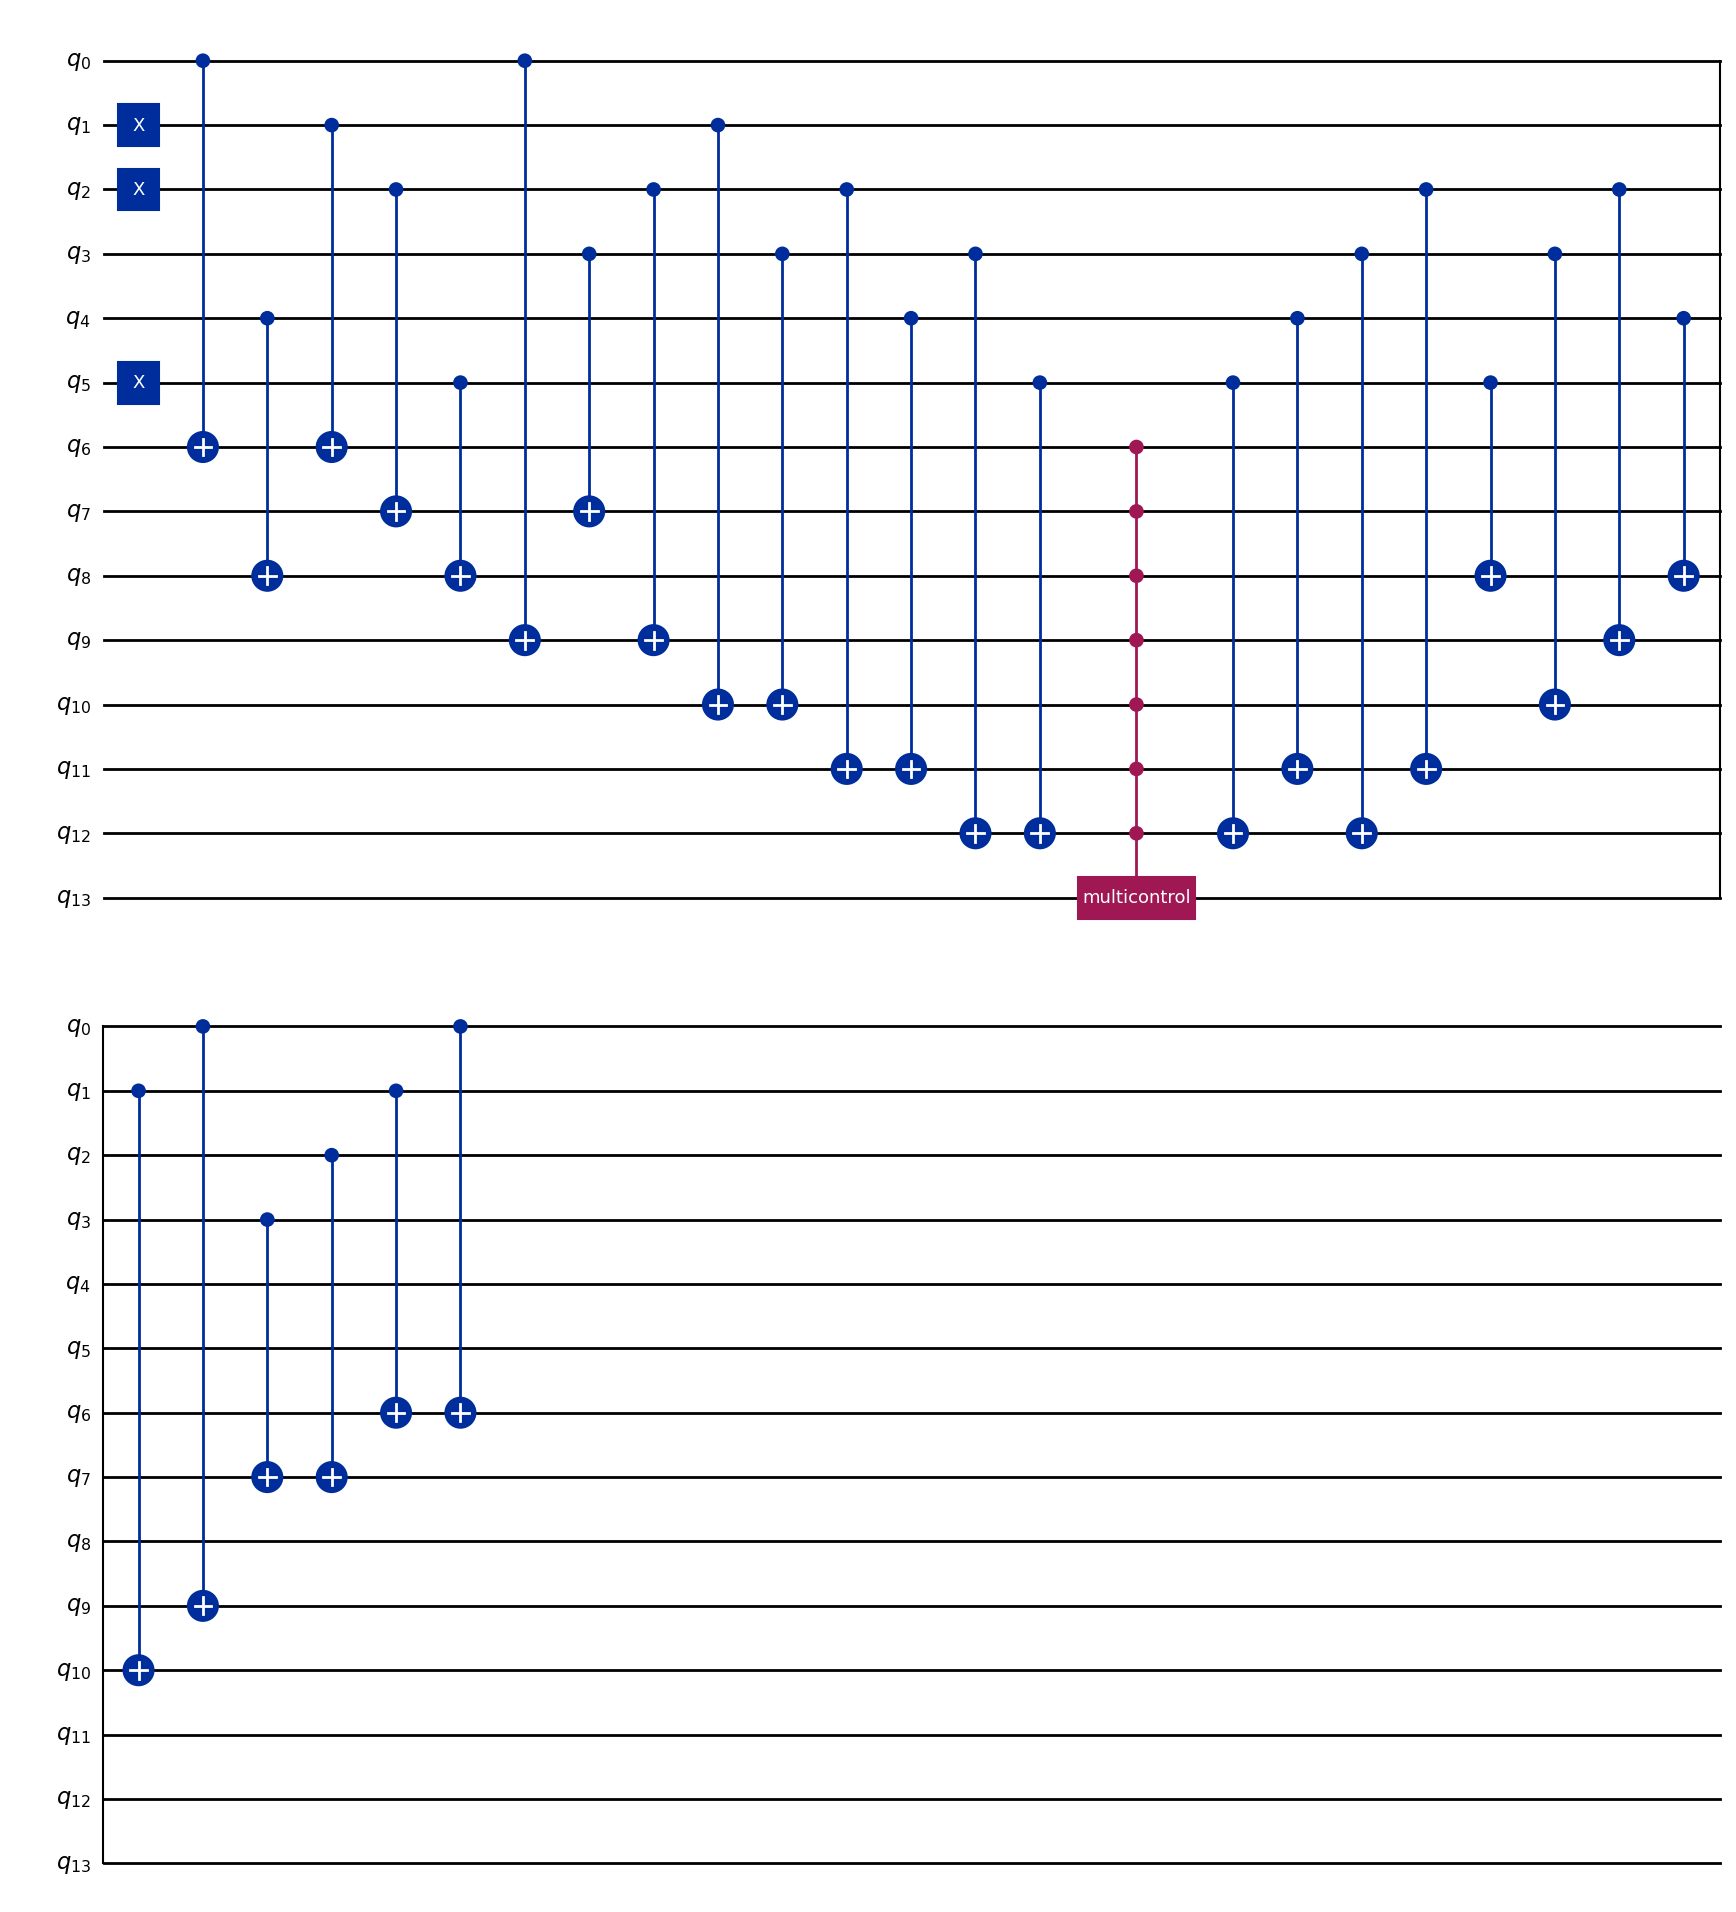

In [ ]:
import tensorcircuit as tc
import numpy as np

def coloring_oracle(c: tc.Circuit, inputs: list[int], assists: list[int], output: int):
    limits = [
        (inputs[0], inputs[1]), (inputs[2], inputs[3]), (inputs[4], inputs[5]),
        (inputs[0], inputs[2]), (inputs[1], inputs[3]), (inputs[2], inputs[4]),
        (inputs[3], inputs[5]),
    ]

    for i, (q_x, q_y) in enumerate(limits):
        c.cnot(q_x, assists[i])
        c.cnot(q_y, assists[i])

    c.multicontrol(*assists, output, ctrl=[1] * len(assists), unitary=tc.gates._x_matrix)

    for i, (q_x, q_y) in enumerate(reversed(limits)):
        rev_i = len(limits) - 1 - i
        c.cnot(q_y, assists[rev_i])
        c.cnot(q_x, assists[rev_i])

n_inputs = 6
n_assists = 7
n_output = 1
n_qubits = n_inputs + n_assists + n_output

input_qubits = list(range(n_inputs))
assist_qubits = list(range(n_inputs, n_inputs + n_assists))
output_qubit = n_inputs + n_assists

test_state_str = "011001"

c = tc.Circuit(n_qubits)

for i, bit in enumerate(test_state_str):
    if bit == '1':
        c.x(i)

coloring_oracle(c, input_qubits, assist_qubits, output_qubit)

exp_val = c.expectation_ps(z=[output_qubit])

print(f"测试输入态: |{test_state_str}> (一个有效解)")
print(f"Oracle 应用后，输出比特的 <Z> 期望值为: {np.real(exp_val):.4f}")

if np.real(exp_val) == -1.0:
    print("测试通过：Oracle 正确识别了有效解！")
else:
    print("测试失败：Oracle 未能正确识别有效解。")
c.draw(output="mpl")

### OPT-1-2 Grover算法实现

根据以上问题 oracle ，实现 Grover 搜索线路，并根据公式给出合适的迭代次数进行测量。可视化不同迭代次数对测量得到正确结果概率的影响曲线。

3x2图着色问题的Grover搜索
目标状态1: 21 (二进制: 010101)
目标状态2: 42 (二进制: 101010)

开始计算 8 种迭代次数的结果...

计算结果:
迭代 1 次: 成功概率 = 0.2583
迭代 2 次: 成功概率 = 0.6024
迭代 3 次: 成功概率 = 0.8969
迭代 4 次: 成功概率 = 0.9992
迭代 5 次: 成功概率 = 0.8596
迭代 6 次: 成功概率 = 0.5459
迭代 7 次: 成功概率 = 0.2099
迭代 8 次: 成功概率 = 0.0145


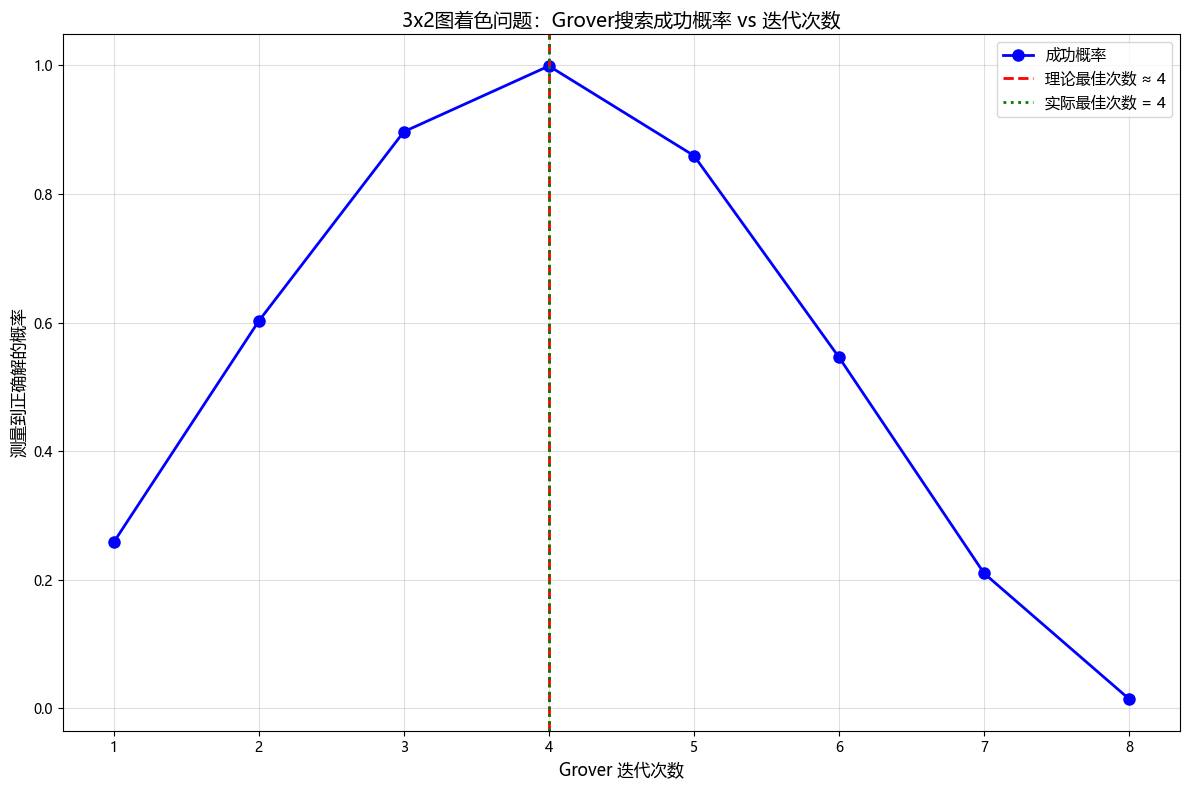


分析总结:
总状态数 N: 64
目标状态数 M: 2
理论最佳迭代次数: 4
实际最佳迭代次数: 4
最高成功概率: 0.9992

在最佳迭代次数(4)下各状态的概率:
状态 010101 (十进制21): 0.4996
状态 101010 (十进制42): 0.4996


In [4]:
import numpy as np
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning

import tensorcircuit as tc
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from qiskit.circuit.library import UnitaryGate
import tensorcircuit.translation


plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False



tensorcircuit.translation.UnitaryGate = UnitaryGate
K = tc.set_backend("tensorflow")

def single_target_oracle(c: tc.Circuit, target_state: int, n_qubits: int):
    
    binary_target = format(target_state, f'0{n_qubits}b')
    
    for i, bit in enumerate(binary_target):
        if bit == '0':
            c.x(i)
    
    if n_qubits > 1:
        c.multicontrol(*list(range(n_qubits-1)), n_qubits-1, 
                      ctrl=[1] * (n_qubits-1), unitary=tc.gates._z_matrix)
    else:
        c.z(0)
    
    for i, bit in enumerate(binary_target):
        if bit == '0':
            c.x(i)

def combined_oracle(c: tc.Circuit, target_states: list, n_qubits: int):
    
    for target_state in target_states:
        single_target_oracle(c, target_state, n_qubits)

def diffuser(c: tc.Circuit, n_qubits: int):

    for i in range(n_qubits):
        c.h(i)
    
    for i in range(n_qubits):
        c.x(i)
        
    if n_qubits > 1:
        c.multicontrol(*list(range(n_qubits-1)), n_qubits-1, 
                      ctrl=[1] * (n_qubits-1), unitary=tc.gates._z_matrix)
    else:
        c.z(0)
    
    for i in range(n_qubits):
        c.x(i)
        
    for i in range(n_qubits):
        c.h(i)

def build_grover_circuit(iterations: int, n_qubits: int, target_states: list):
    
    c = tc.Circuit(n_qubits)
    
    for i in range(n_qubits):
        c.h(i)
    
    for _ in range(iterations):
        combined_oracle(c, target_states, n_qubits)
        diffuser(c, n_qubits)
        
    return c

n_qubits = 6
target_states = [21, 42]  

print("3x2图着色问题的Grover搜索")
print(f"目标状态1: {target_states[0]} (二进制: {format(target_states[0], f'0{n_qubits}b')})")
print(f"目标状态2: {target_states[1]} (二进制: {format(target_states[1], f'0{n_qubits}b')})")

max_iterations = 8
results = []

print(f"\n开始计算 {max_iterations} 种迭代次数的结果...")

for k in range(1, max_iterations + 1):
    circuit = build_grover_circuit(k, n_qubits, target_states)
    state_vector = circuit.state()
    
    success_prob = 0
    for target in target_states:
        success_prob += K.abs(state_vector[target])**2
    
    results.append((k, float(success_prob)))

print("\n计算结果:")
for iteration, probability in results:
    print(f"迭代 {iteration} 次: 成功概率 = {probability:.4f}")

iterations_list = [r[0] for r in results]
probabilities_list = [r[1] for r in results]

plt.figure(figsize=(12, 8))
plt.plot(iterations_list, probabilities_list, 'bo-', linewidth=2, markersize=8, label='成功概率')
plt.xlabel("Grover 迭代次数", fontsize=12)
plt.ylabel("测量到正确解的概率", fontsize=12)
plt.title("3x2图着色问题：Grover搜索成功概率 vs 迭代次数", fontsize=14)
plt.xticks(iterations_list)
plt.grid(True, alpha=0.4)

N = 2**n_qubits
M = len(target_states)
optimal_k = int(np.round((np.pi / 4) * np.sqrt(N / M)))
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, 
           label=f'理论最佳次数 ≈ {optimal_k}')

max_prob = max(probabilities_list)
max_prob_iter = probabilities_list.index(max_prob) + 1
plt.axvline(x=max_prob_iter, color='g', linestyle=':', linewidth=2,
           label=f'实际最佳次数 = {max_prob_iter}')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n分析总结:")
print(f"总状态数 N: {N}")
print(f"目标状态数 M: {M}")
print(f"理论最佳迭代次数: {optimal_k}")
print(f"实际最佳迭代次数: {max_prob_iter}")
print(f"最高成功概率: {max_prob:.4f}")

print(f"\n在最佳迭代次数({max_prob_iter})下各状态的概率:")
best_circuit = build_grover_circuit(max_prob_iter, n_qubits, target_states)
best_state = best_circuit.state()
for target in target_states:
    prob = K.abs(best_state[target])**2
    binary = format(target, f'0{n_qubits}b')
    print(f"状态 {binary} (十进制{target}): {float(prob):.4f}")

## OPT-2 选做 变分优化算法

### OPT-2-1 求解方程

实现基于 TensorCircuit jax 或 tf 后端的函数，给定输入 $a, b, c, d$ 输出 $ax^3+bx^2+cx+d=0$ 的解，要求基于变分优化梯度下降的方式。

--- 求解三次方程 ax^3 + bx^2 + cx + d = 0 ---

从初始点 x = 0.0 开始寻找解...
--- 求解方程: 1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0 ---
迭代 0: x = 0.010000, loss = 4.90e+01

从初始点 x = 0.0 开始寻找解...
--- 求解方程: 1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0 ---
迭代 0: x = 0.010000, loss = 4.90e+01
迭代 100: x = 0.851136, loss = 1.50e+00
迭代 100: x = 0.851136, loss = 1.50e+00
迭代 200: x = 0.999149, loss = 5.63e-05

在步骤 221 达到收敛阈值。
找到的解 x ≈ 1.00002110
验证: f(1.0000) = -1.688004e-04
迭代 200: x = 0.999149, loss = 5.63e-05

在步骤 221 达到收敛阈值。
找到的解 x ≈ 1.00002110
验证: f(1.0000) = -1.688004e-04


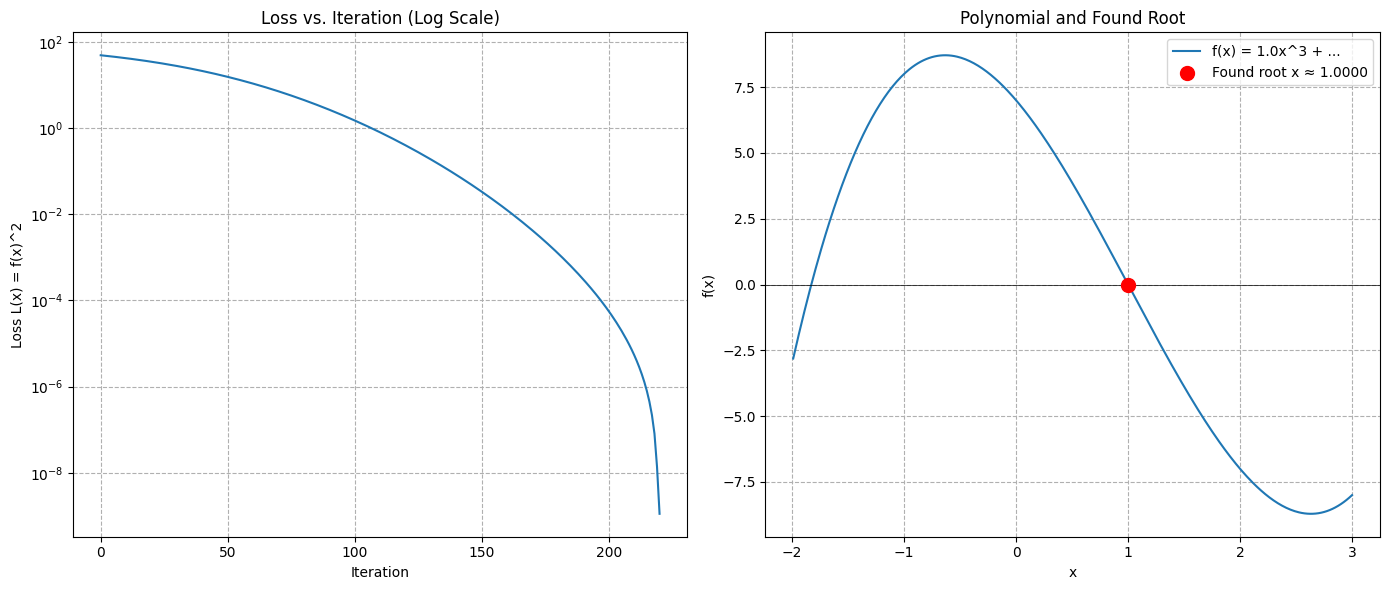


从初始点 x = 5.0 开始寻找解...
--- 求解方程: 1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0 ---
迭代 0: x = 4.990000, loss = 1.02e+03
迭代 100: x = 4.286650, loss = 8.66e+01
迭代 100: x = 4.286650, loss = 8.66e+01
迭代 200: x = 4.024319, loss = 1.22e+01
迭代 200: x = 4.024319, loss = 1.22e+01
迭代 300: x = 3.911747, loss = 1.98e+00
迭代 300: x = 3.911747, loss = 1.98e+00
迭代 400: x = 3.861609, loss = 2.98e-01
迭代 400: x = 3.861609, loss = 2.98e-01
迭代 500: x = 3.840358, loss = 3.77e-02
迭代 500: x = 3.840358, loss = 3.77e-02
迭代 600: x = 3.832208, loss = 3.77e-03
迭代 600: x = 3.832208, loss = 3.77e-03
迭代 700: x = 3.829465, loss = 2.84e-04
迭代 700: x = 3.829465, loss = 2.84e-04
迭代 800: x = 3.828672, loss = 1.58e-05
迭代 800: x = 3.828672, loss = 1.58e-05
迭代 900: x = 3.828476, loss = 6.27e-07
迭代 900: x = 3.828476, loss = 6.27e-07
迭代 1000: x = 3.828435, loss = 1.63e-08

在步骤 1009 达到收敛阈值。
找到的解 x ≈ 3.82843304
验证: f(3.8284) = 9.155273e-05
迭代 1000: x = 3.828435, loss = 1.63e-08

在步骤 1009 达到收敛阈值。
找到的解 x ≈ 3.82843304
验证: f(3.8284) = 9.155273e

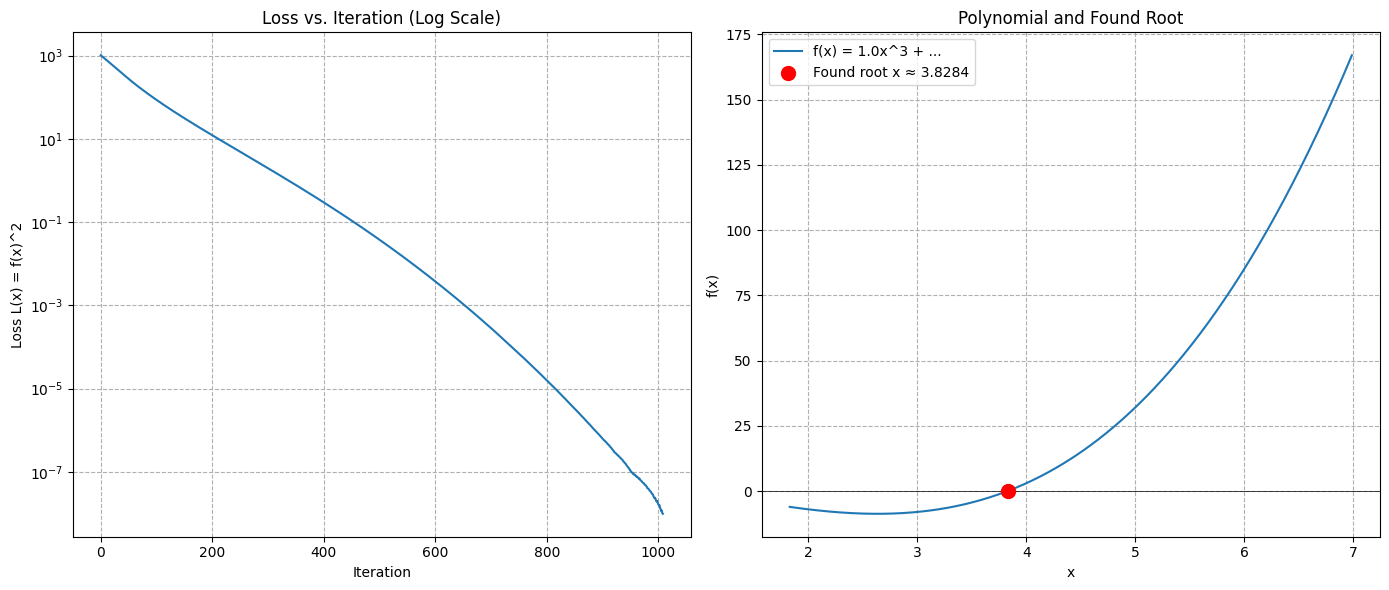


从初始点 x = 10.0 开始寻找解...
--- 求解方程: 1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0 ---
迭代 0: x = 9.990000, loss = 4.32e+05
迭代 100: x = 9.089050, loss = 2.17e+05
迭代 100: x = 9.089050, loss = 2.17e+05
迭代 200: x = 8.409603, loss = 1.21e+05
迭代 200: x = 8.409603, loss = 1.21e+05
迭代 300: x = 7.884496, loss = 7.39e+04
迭代 300: x = 7.884496, loss = 7.39e+04
迭代 400: x = 7.465890, loss = 4.80e+04
迭代 400: x = 7.465890, loss = 4.80e+04
迭代 500: x = 7.123334, loss = 3.27e+04
迭代 500: x = 7.123334, loss = 3.27e+04
迭代 600: x = 6.836846, loss = 2.32e+04
迭代 600: x = 6.836846, loss = 2.32e+04
迭代 700: x = 6.592886, loss = 1.70e+04
迭代 700: x = 6.592886, loss = 1.70e+04
迭代 800: x = 6.381974, loss = 1.28e+04
迭代 800: x = 6.381974, loss = 1.28e+04
迭代 900: x = 6.197302, loss = 9.79e+03
迭代 900: x = 6.197302, loss = 9.79e+03
迭代 1000: x = 6.033848, loss = 7.64e+03
迭代 1000: x = 6.033848, loss = 7.64e+03
迭代 1100: x = 5.887833, loss = 6.05e+03
迭代 1100: x = 5.887833, loss = 6.05e+03
迭代 1200: x = 5.756345, loss = 4.85e+03
迭代 1200: x =

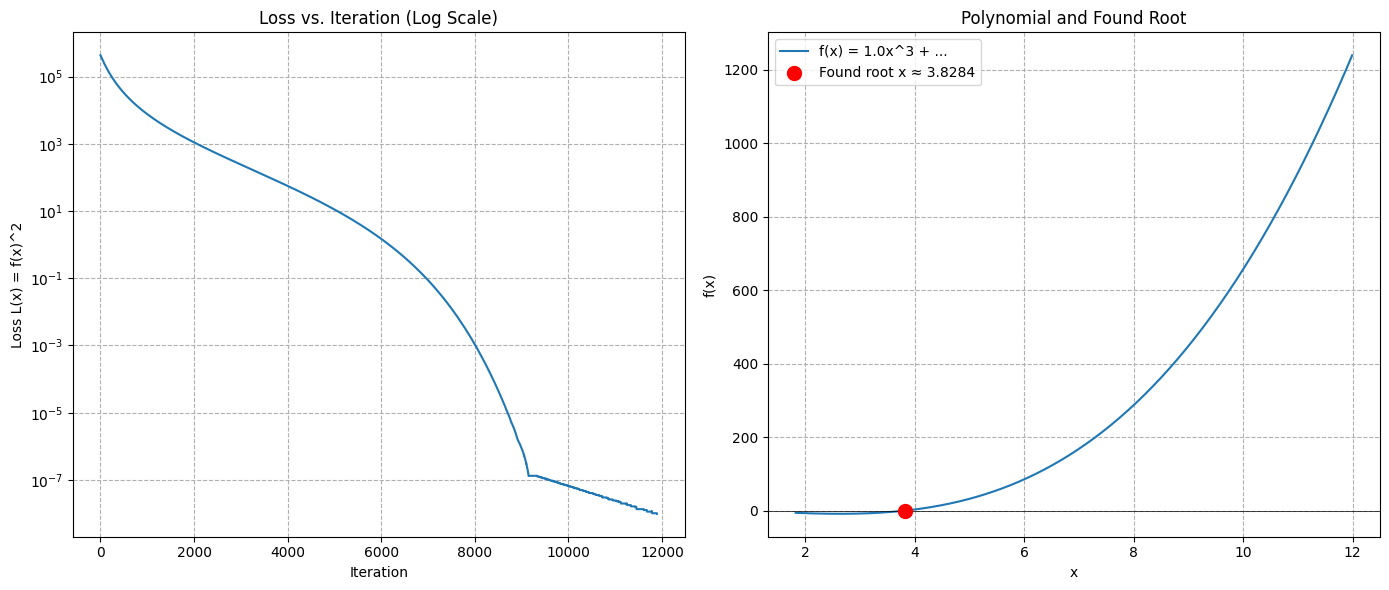


从初始点 x = -10.0 开始寻找解...
--- 求解方程: 1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0 ---
迭代 0: x = -9.990000, loss = 1.55e+06
迭代 100: x = -9.069977, loss = 8.89e+05
迭代 100: x = -9.069977, loss = 8.89e+05
迭代 200: x = -8.336267, loss = 5.49e+05
迭代 200: x = -8.336267, loss = 5.49e+05
迭代 300: x = -7.742431, loss = 3.59e+05
迭代 300: x = -7.742431, loss = 3.59e+05
迭代 400: x = -7.251599, loss = 2.47e+05
迭代 400: x = -7.251599, loss = 2.47e+05
迭代 500: x = -6.838269, loss = 1.76e+05
迭代 500: x = -6.838269, loss = 1.76e+05
迭代 600: x = -6.484531, loss = 1.30e+05
迭代 600: x = -6.484531, loss = 1.30e+05
迭代 700: x = -6.177528, loss = 9.78e+04
迭代 700: x = -6.177528, loss = 9.78e+04
迭代 800: x = -5.907856, loss = 7.55e+04
迭代 800: x = -5.907856, loss = 7.55e+04
迭代 900: x = -5.668489, loss = 5.93e+04
迭代 900: x = -5.668489, loss = 5.93e+04
迭代 1000: x = -5.454085, loss = 4.73e+04
迭代 1000: x = -5.454085, loss = 4.73e+04
迭代 1100: x = -5.260509, loss = 3.82e+04
迭代 1100: x = -5.260509, loss = 3.82e+04
迭代 1200: x = -5.084513, los

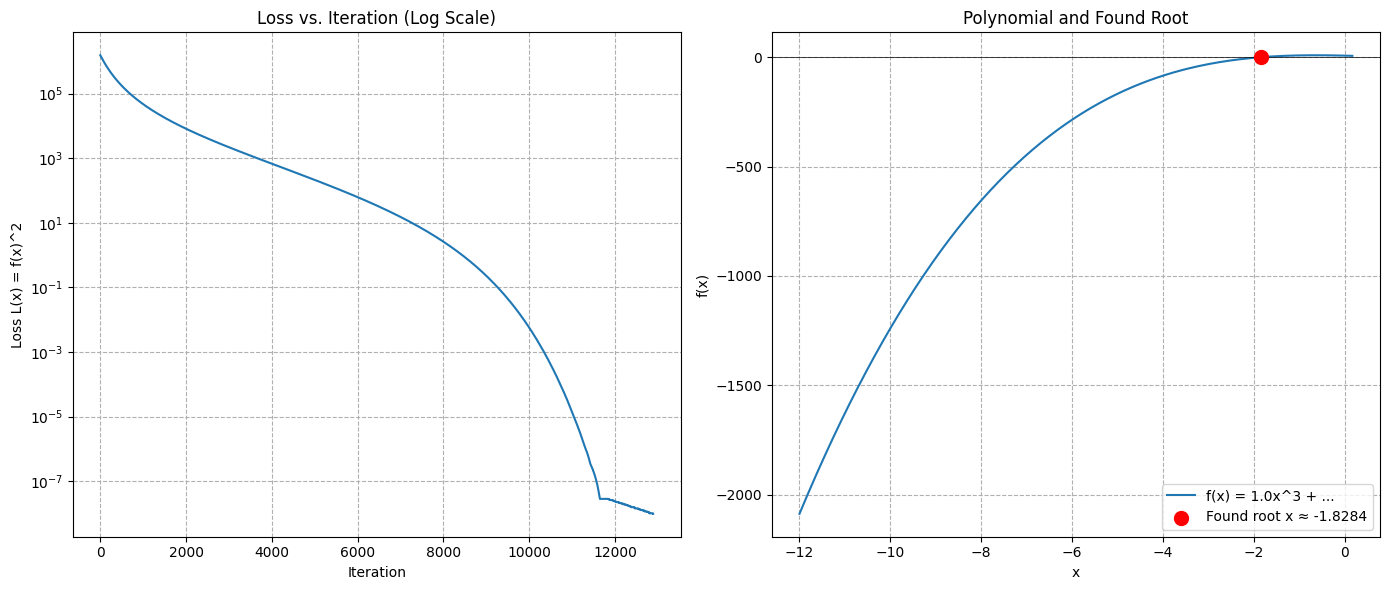

三次方程1.0x^3 + -3.0x^2 + -5.0x + 7.0 = 0的解为: [np.float32(-1.8284), np.float32(1.0), np.float32(3.8284)]


In [10]:
import tensorflow as tf
import numpy as np
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning
import tensorcircuit as tc
from matplotlib import pyplot as plt

K = tc.set_backend("tensorflow")

def solve_cubic_equation(a: float, b: float, c: float, d: float, 
                         initial_x: float = 0.0, 
                         learning_rate: float = 0.01, 
                         steps: int = 20000,
                         convergence_threshold: float = 1e-8):
    
    print(f"--- 求解方程: {a}x^3 + {b}x^2 + {c}x + {d} = 0 ---")
    
    a, b, c, d = [tf.convert_to_tensor(val, dtype=tf.float32) for val in [a, b, c, d]]
    x = tf.Variable(initial_x, dtype=tf.float32)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    history = {"x": [], "loss": []}

    for i in range(steps):
        with tf.GradientTape() as tape:
            fx = a * x**3 + b * x**2 + c * x + d
            loss = fx**2
        
        grads = tape.gradient(loss, [x])
        optimizer.apply_gradients(zip(grads, [x]))
        
        history["x"].append(x.numpy())
        history["loss"].append(loss.numpy())
        
        if i % 100 == 0:
            print(f"迭代 {i}: x = {x.numpy():.6f}, loss = {loss.numpy():.2e}")
        
        if loss.numpy() < convergence_threshold:
            print(f"\n在步骤 {i+1} 达到收敛阈值。")
            break
            
    final_x = x.numpy()
    print(f"找到的解 x ≈ {final_x:.8f}")
    final_fx = a.numpy() * final_x**3 + b.numpy() * final_x**2 + c.numpy() * final_x + d.numpy()
    print(f"验证: f({final_x:.4f}) = {final_fx:.6e}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    ax1.plot(history["loss"])
    ax1.set_yscale('log')
    ax1.set_title("Loss vs. Iteration (Log Scale)")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss L(x) = f(x)^2")
    ax1.grid(True, which="both", ls="--")
    
    x_range = np.linspace(min(history["x"]) - 2, max(history["x"]) + 2, 400)
    y_range = a.numpy() * x_range**3 + b.numpy() * x_range**2 + c.numpy() * x_range + d.numpy()
    ax2.plot(x_range, y_range, label=f"f(x) = {a.numpy()}x^3 + ...")
    ax2.axhline(0, color='black', linewidth=0.5)
    ax2.scatter(final_x, final_fx, color='red', s=100, zorder=5, label=f'Found root x ≈ {final_x:.4f}')
    ax2.set_title("Polynomial and Found Root")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f(x)")
    ax2.grid(True, ls="--")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return final_x

def run_solver_with_user_input():
    initial_points = [0.0, 5.0, 10.0, -10.0]
    
    print("--- 求解三次方程 ax^3 + bx^2 + cx + d = 0 ---")
    
    while True:
        try:
            a_str = input("请输入系数 a: ")
            a = float(a_str)
            b_str = input("请输入系数 b: ")
            b = float(b_str)
            c_str = input("请输入系数 c: ")
            c = float(c_str)
            d_str = input("请输入系数 d: ")
            d = float(d_str)
            break
        except ValueError:
            print("输入无效，请重试。")

    found_solutions = []
    for start_x in initial_points:
        print("\n" + "="*50)
        print(f"从初始点 x = {start_x} 开始寻找解...")
        solution = solve_cubic_equation(a, b, c, d, initial_x=start_x)
        rounded_solution = round(solution, 4)
        if rounded_solution not in found_solutions:
            found_solutions.append(rounded_solution)

    print(f"三次方程{a}x^3 + {b}x^2 + {c}x + {d} = 0的解为: {sorted(found_solutions)}")

run_solver_with_user_input()

### OPT-2-2 优化点

给定一组点 $(x_i, y_i)$，要求找到坐标系上到所有点的距离和最近的点的坐标并可视化，基于变分优化梯度下降的方式。（多村庄挖井）

MULTI-VILLAGE WELL LOCATION OPTIMIZATION PROBLEM

Choose input method:
1. Manual input
2. Use predefined test cases
VILLAGE COORDINATES INPUT
VILLAGE COORDINATES INPUT

Enter coordinates for 6 villages:
Format: x y (separated by space)
----------------------------------------

Enter coordinates for 6 villages:
Format: x y (separated by space)
----------------------------------------
  -> Village 1: (1.0, 1.0)
  -> Village 1: (1.0, 1.0)
  -> Village 2: (5.0, 2.0)
  -> Village 2: (5.0, 2.0)
  -> Village 3: (3.0, 6.0)
  -> Village 3: (3.0, 6.0)
  -> Village 4: (7.0, 5.0)
  -> Village 5: (2.0, 8.0)
  -> Village 4: (7.0, 5.0)
  -> Village 5: (2.0, 8.0)
  -> Village 6: (8.0, 2.0)

INPUT SUMMARY:
  Village 1: (  1.00,   1.00)
  Village 2: (  5.00,   2.00)
  Village 3: (  3.00,   6.00)
  Village 4: (  7.00,   5.00)
  Village 5: (  2.00,   8.00)
  Village 6: (  8.00,   2.00)

OPTIMIZATION PARAMETERS
  -> Village 6: (8.0, 2.0)

INPUT SUMMARY:
  Village 1: (  1.00,   1.00)
  Village 2: (  5.00,  

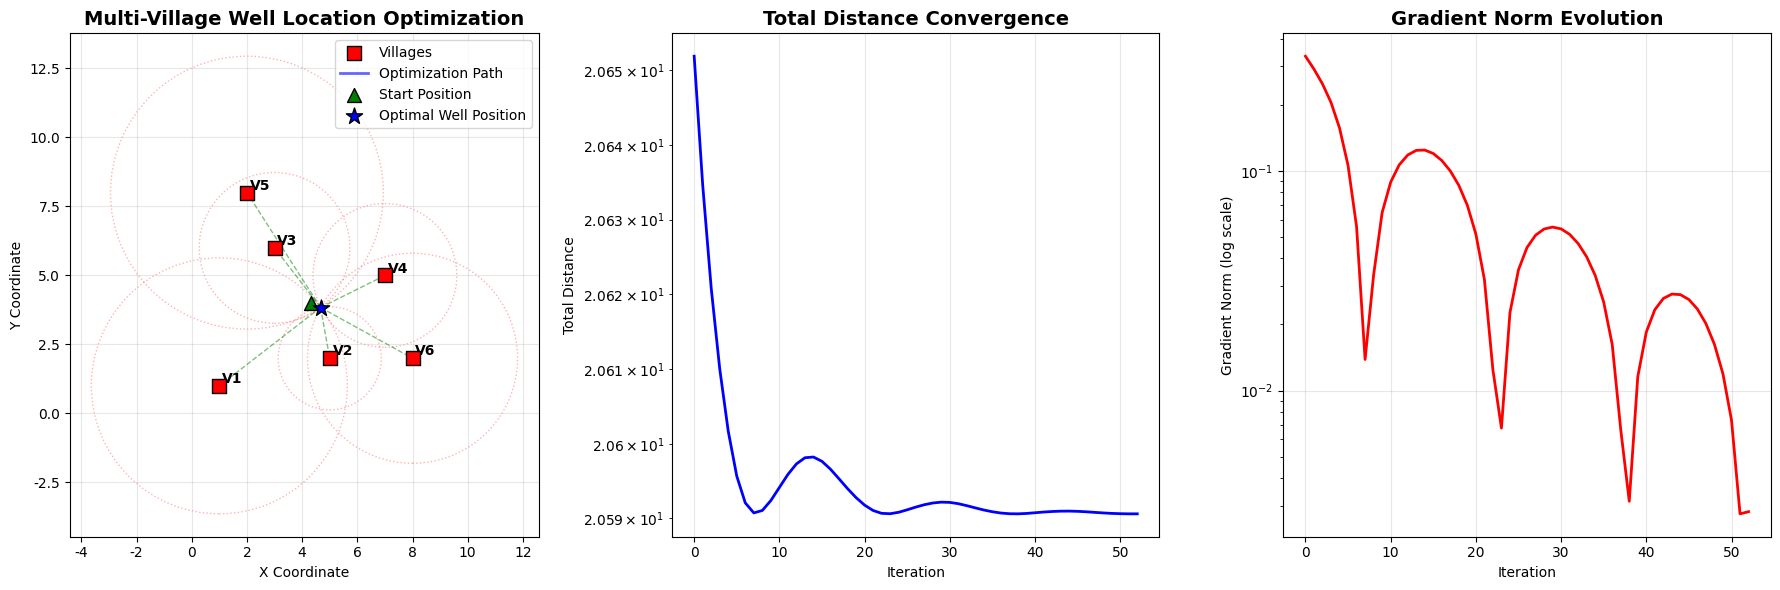

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning

plt.rcParams['axes.unicode_minus'] = False

def input_village_coordinates():
    print("=" * 60)
    print("VILLAGE COORDINATES INPUT")
    print("=" * 60)
    
    villages = []
    
    while True:
        try:
            num_villages = int(input("Enter the number of villages: "))
            if num_villages <= 0:
                print("Number of villages must be positive!")
                continue
            break
        except ValueError:
            print("Please enter a valid integer!")
    
    print(f"\nEnter coordinates for {num_villages} villages:")
    print("Format: x y (separated by space)")
    print("-" * 40)
    
    for i in range(num_villages):
        while True:
            try:
                coords_input = input(f"Village {i+1} coordinates (x y): ").strip()
                x, y = map(float, coords_input.split())
                villages.append((x, y))
                print(f"  -> Village {i+1}: ({x}, {y})")
                break
            except ValueError:
                print("Invalid input! Please enter two numbers separated by space.")
    
    print("\n" + "=" * 40)
    print("INPUT SUMMARY:")
    for i, (x, y) in enumerate(villages):
        print(f"  Village {i+1}: ({x:>6.2f}, {y:>6.2f})")
    print("=" * 40)
    
    return villages

def find_optimal_well_location(villages, learning_rate=0.01, max_iterations=10000, tolerance=1e-6):
    print(f"Number of villages: {len(villages)}")
    print(f"Village coordinates: {villages}")
    
    villages_tensor = tf.constant(villages, dtype=tf.float32)
    
    initial_x = np.mean([v[0] for v in villages])
    initial_y = np.mean([v[1] for v in villages])
    
    well_x = tf.Variable(initial_x, dtype=tf.float32, name="well_x")
    well_y = tf.Variable(initial_y, dtype=tf.float32, name="well_y")
    
    print(f"Initial well position: ({initial_x:.3f}, {initial_y:.3f})")
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    history = {
        'well_positions': [],
        'total_distances': [],
        'gradients': []
    }
    
    for iteration in range(max_iterations):
        with tf.GradientTape() as tape:
            well_position = tf.stack([well_x, well_y])
            distances = tf.norm(villages_tensor - well_position, axis=1)
            total_distance = tf.reduce_sum(distances)
        
        gradients = tape.gradient(total_distance, [well_x, well_y])
        
        history['well_positions'].append([well_x.numpy(), well_y.numpy()])
        history['total_distances'].append(total_distance.numpy())
        history['gradients'].append([g.numpy() if g is not None else 0.0 for g in gradients])
        
        optimizer.apply_gradients(zip(gradients, [well_x, well_y]))
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration:>4}: Position=({well_x.numpy():>7.4f}, {well_y.numpy():>7.4f}), "
                  f"Total Distance={total_distance.numpy():>8.4f}")
        
        if iteration > 0:
            distance_change = abs(history['total_distances'][-1] - history['total_distances'][-2])
            if distance_change < tolerance:
                print(f"\nConverged at iteration {iteration}! Distance change: {distance_change:.2e}")
                break
    
    optimal_location = (well_x.numpy(), well_y.numpy())
    final_distance = total_distance.numpy()
    
    print(f"\nOPTIMAL SOLUTION:")
    print(f"   Well position: ({optimal_location[0]:.6f}, {optimal_location[1]:.6f})")
    print(f"   Total distance: {final_distance:.6f}")
    
    return optimal_location, history

def visualize_optimization(villages, optimal_location, history):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    villages_array = np.array(villages)
    ax1.scatter(villages_array[:, 0], villages_array[:, 1], 
               c='red', s=100, marker='s', label='Villages', zorder=5, edgecolors='black')
    
    positions = np.array(history['well_positions'])
    ax1.plot(positions[:, 0], positions[:, 1], 'b-', alpha=0.6, linewidth=2, label='Optimization Path')
    ax1.scatter(positions[0, 0], positions[0, 1], c='green', s=100, marker='^', 
               label='Start Position', zorder=5, edgecolors='black')
    ax1.scatter(optimal_location[0], optimal_location[1], c='blue', s=150, marker='*', 
               label='Optimal Well Position', zorder=5, edgecolors='black')
    
    for village in villages:
        ax1.plot([optimal_location[0], village[0]], [optimal_location[1], village[1]], 
                'g--', alpha=0.5, linewidth=1)
    
    for i, village in enumerate(villages):
        distance = np.sqrt((optimal_location[0] - village[0])**2 + 
                          (optimal_location[1] - village[1])**2)
        circle = Circle(village, distance, fill=False, color='red', alpha=0.3, linestyle=':')
        ax1.add_patch(circle)
        ax1.text(village[0]+0.1, village[1]+0.1, f'V{i+1}', fontsize=10, fontweight='bold')
    
    ax1.set_title('Multi-Village Well Location Optimization', fontsize=14, fontweight='bold')
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal', adjustable='box')
    
    ax2.plot(history['total_distances'], 'b-', linewidth=2)
    ax2.set_title('Total Distance Convergence', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Total Distance')
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')
    
    gradients = np.array(history['gradients'])
    gradient_norms = np.linalg.norm(gradients, axis=1)
    
    valid_norms = gradient_norms[gradient_norms > 0]
    valid_indices = np.where(gradient_norms > 0)[0]
    
    if len(valid_norms) > 0:
        ax3.plot(valid_indices, valid_norms, 'r-', linewidth=2)
        ax3.set_yscale('log')
        ax3.set_ylabel('Gradient Norm (log scale)')
    else:
        ax3.plot(gradient_norms, 'r-', linewidth=2)
        ax3.set_ylabel('Gradient Norm (linear scale)')
        print("Warning: No positive gradient values found, using linear scale")
    
    ax3.set_title('Gradient Norm Evolution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Iteration')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def calculate_analytical_solution(villages):
    villages_array = np.array(villages)
    
    from scipy.optimize import minimize
    
    def objective(point):
        return np.sum(np.linalg.norm(villages_array - point, axis=1))
    
    initial_guess = np.mean(villages_array, axis=0)
    result = minimize(objective, initial_guess, method='BFGS')
    
    return result.x, result.fun

def run_multi_village_optimization():
    print("=" * 80)
    print("MULTI-VILLAGE WELL LOCATION OPTIMIZATION PROBLEM")
    print("=" * 80)
    
    print("\nChoose input method:")
    print("1. Manual input")
    print("2. Use predefined test cases")
    
    while True:
        try:
            choice = input("Enter your choice (1 or 2): ").strip()
            if choice in ['1', '2']:
                break
            else:
                print("Please enter 1 or 2!")
        except KeyboardInterrupt:
            print("\nOperation cancelled.")
            return
    
    if choice == '1':
        try:
            villages = input_village_coordinates()
            
            print("\n" + "=" * 60)
            print("OPTIMIZATION PARAMETERS")
            print("=" * 60)
            
            while True:
                try:
                    lr = input("Enter learning rate (default 0.05): ").strip()
                    learning_rate = 0.05 if lr == "" else float(lr)
                    break
                except ValueError:
                    print("Please enter a valid number!")
            
            while True:
                try:
                    iter_input = input("Enter max iterations (default 5000): ").strip()
                    max_iterations = 5000 if iter_input == "" else int(iter_input)
                    break
                except ValueError:
                    print("Please enter a valid integer!")
            
            print(f"\nStarting optimization with:")
            print(f"  Learning rate: {learning_rate}")
            print(f"  Max iterations: {max_iterations}")
            print("=" * 60)
            
            optimal_loc, history = find_optimal_well_location(
                villages, learning_rate=learning_rate, max_iterations=max_iterations
            )
            
            analytical_loc, analytical_dist = calculate_analytical_solution(villages)
            print(f"\nTheoretical optimal solution: ({analytical_loc[0]:.6f}, {analytical_loc[1]:.6f})")
            print(f"Theoretical optimal distance: {analytical_dist:.6f}")
            
            error = np.linalg.norm(np.array(optimal_loc) - np.array(analytical_loc))
            print(f"Solution error: {error:.6f}")
            
            visualize_optimization(villages, optimal_loc, history)
            
        except KeyboardInterrupt:
            print("\nOperation cancelled.")
            return
    
    else:
        print("\n" + "=" * 60)
        print("TEST CASE 1: Square Distribution (4 Villages)")
        print("=" * 60)
        villages1 = [(0, 0), (4, 0), (4, 4), (0, 4)]
        
        optimal_loc1, history1 = find_optimal_well_location(
            villages1, learning_rate=0.1, max_iterations=5000
        )
        
        analytical_loc1, analytical_dist1 = calculate_analytical_solution(villages1)
        print(f"Theoretical optimal solution: ({analytical_loc1[0]:.6f}, {analytical_loc1[1]:.6f})")
        print(f"Theoretical optimal distance: {analytical_dist1:.6f}")
        
        visualize_optimization(villages1, optimal_loc1, history1)
        
        print("\n" + "="*60)
        print("TEST CASE 2: Irregular Distribution (6 Villages)")
        print("="*60)
        villages2 = [(1, 1), (5, 2), (3, 6), (7, 5), (2, 8), (8, 1)]
        
        optimal_loc2, history2 = find_optimal_well_location(
            villages2, learning_rate=0.05, max_iterations=8000
        )
        
        analytical_loc2, analytical_dist2 = calculate_analytical_solution(villages2)
        print(f"Theoretical optimal solution: ({analytical_loc2[0]:.6f}, {analytical_loc2[1]:.6f})")
        print(f"Theoretical optimal distance: {analytical_dist2:.6f}")
        
        visualize_optimization(villages2, optimal_loc2, history2)
        
        print("\n" + "="*80)
        print("RESULT COMPARISON ANALYSIS")
        print("="*80)
        
        def compare_solutions(case_name, tf_solution, analytical_solution):
            error = np.linalg.norm(np.array(tf_solution) - np.array(analytical_solution))
            print(f"{case_name}:")
            print(f"  TensorFlow solution: ({tf_solution[0]:.6f}, {tf_solution[1]:.6f})")
            print(f"  Theoretical solution: ({analytical_solution[0]:.6f}, {analytical_solution[1]:.6f})")
            print(f"  Error: {error:.6f}")
            print()
        
        compare_solutions("Case 1 (Square)", optimal_loc1, analytical_loc1)
        compare_solutions("Case 2 (Irregular)", optimal_loc2, analytical_loc2)

run_multi_village_optimization()

### OPT-2-3 优化线

给定一组点 $(x_i, y_i)$，要求找到坐标系上的一条直线到所有点的距离和最小，基于变分优化梯度下降的方式。（多村庄通公路）

MULTI-VILLAGE ROAD OPTIMIZATION PROBLEM

Choose input method:
1. Manual input
2. Use predefined test cases
Please enter 1 or 2!
VILLAGE COORDINATES INPUT FOR ROAD OPTIMIZATION
Please enter 1 or 2!
VILLAGE COORDINATES INPUT FOR ROAD OPTIMIZATION

Enter coordinates for 6 villages:
Format: x y (separated by space)
----------------------------------------

Enter coordinates for 6 villages:
Format: x y (separated by space)
----------------------------------------
  -> Village 1: (1.0, 1.0)
  -> Village 1: (1.0, 1.0)
  -> Village 2: (3.0, 3.0)
  -> Village 2: (3.0, 3.0)
Invalid input! Please enter two numbers separated by space.
Invalid input! Please enter two numbers separated by space.
  -> Village 3: (2.0, 4.0)
  -> Village 4: (5.0, 3.0)
  -> Village 3: (2.0, 4.0)
  -> Village 4: (5.0, 3.0)
  -> Village 5: (4.0, 5.0)
  -> Village 5: (4.0, 5.0)
  -> Village 6: (6.0, 1.0)

INPUT SUMMARY:
  Village 1: (  1.00,   1.00)
  Village 2: (  3.00,   3.00)
  Village 3: (  2.00,   4.00)
  Village 4: (

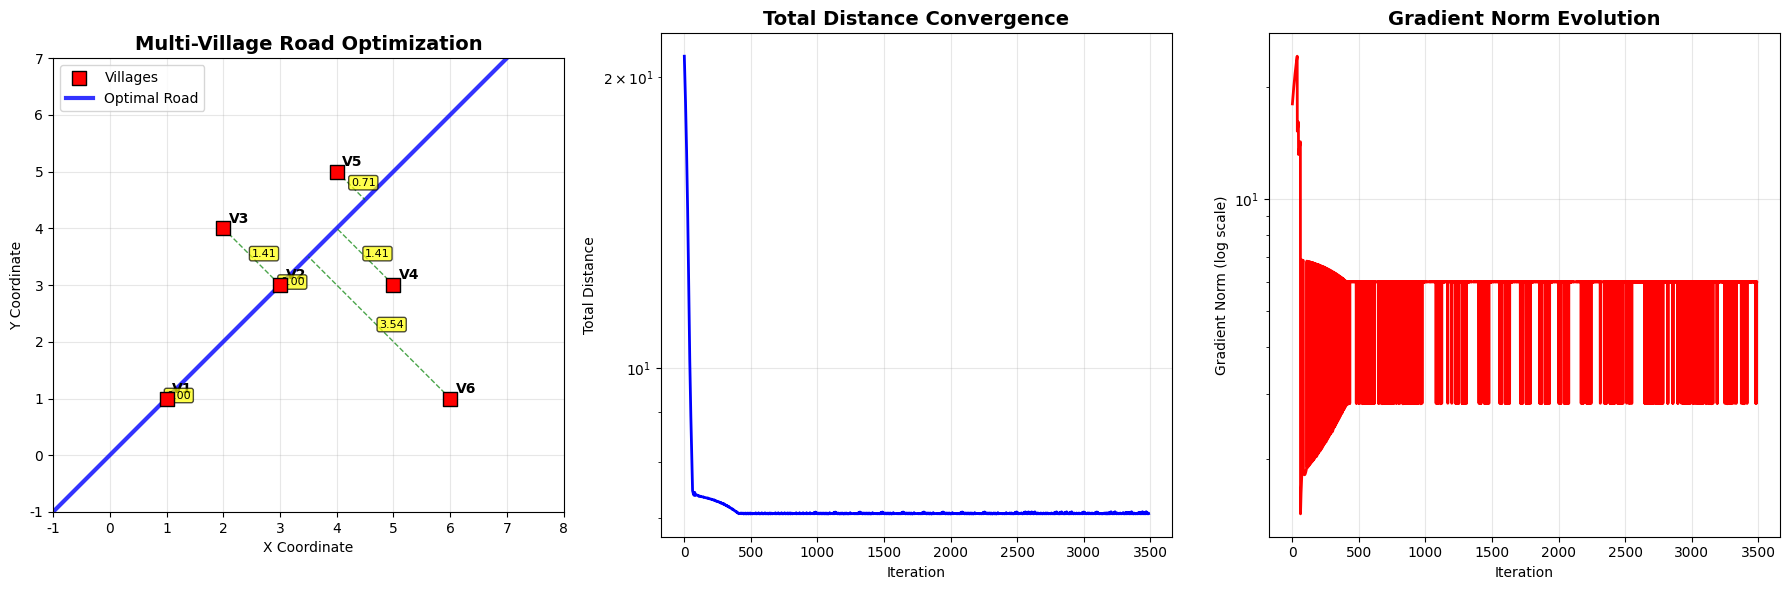

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

if not hasattr(np, 'ComplexWarning'):
    class ComplexWarning(UserWarning):
        pass
    np.ComplexWarning = ComplexWarning

plt.rcParams['axes.unicode_minus'] = False

def input_village_coordinates_for_road():
    """交互式输入村庄坐标（用于公路优化）"""
    print("=" * 60)
    print("VILLAGE COORDINATES INPUT FOR ROAD OPTIMIZATION")
    print("=" * 60)
    
    villages = []
    
    while True:
        try:
            num_villages = int(input("Enter the number of villages: "))
            if num_villages <= 0:
                print("Number of villages must be positive!")
                continue
            break
        except ValueError:
            print("Please enter a valid integer!")
    
    print(f"\nEnter coordinates for {num_villages} villages:")
    print("Format: x y (separated by space)")
    print("-" * 40)
    
    for i in range(num_villages):
        while True:
            try:
                coords_input = input(f"Village {i+1} coordinates (x y): ").strip()
                x, y = map(float, coords_input.split())
                villages.append((x, y))
                print(f"  -> Village {i+1}: ({x}, {y})")
                break
            except ValueError:
                print("Invalid input! Please enter two numbers separated by space.")
    
    print("\n" + "=" * 40)
    print("INPUT SUMMARY:")
    for i, (x, y) in enumerate(villages):
        print(f"  Village {i+1}: ({x:>6.2f}, {y:>6.2f})")
    print("=" * 40)
    
    return villages

def distance_point_to_line(points, a, b, c):
    """计算点到直线的距离
    直线方程: ax + by + c = 0
    点到直线距离: |ax + by + c| / sqrt(a^2 + b^2)
    """
    points_tensor = tf.constant(points, dtype=tf.float32)
    x, y = points_tensor[:, 0], points_tensor[:, 1]
    
    # 计算分子: |ax + by + c|
    numerator = tf.abs(a * x + b * y + c)
    
    # 计算分母: sqrt(a^2 + b^2)
    denominator = tf.sqrt(a**2 + b**2)
    
    # 防止除零
    denominator = tf.maximum(denominator, 1e-8)
    
    distances = numerator / denominator
    return distances

def find_optimal_road_line(villages, learning_rate=0.01, max_iterations=10000, tolerance=1e-6):
    """使用梯度下降找到最优直线位置"""
    print(f"Number of villages: {len(villages)}")
    print(f"Village coordinates: {villages}")
    
    # 初始化直线参数 ax + by + c = 0
    # 为了避免退化，我们固定 a^2 + b^2 = 1 （单位法向量）
    # 使用参数化: a = cos(theta), b = sin(theta)
    initial_theta = tf.Variable(0.0, dtype=tf.float32, name="theta")  # 法向量角度
    initial_c = tf.Variable(0.0, dtype=tf.float32, name="c")          # 截距参数
    
    print(f"Initial line parameters: theta={initial_theta.numpy():.3f}, c={initial_c.numpy():.3f}")
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    history = {
        'line_params': [],      # (theta, c)
        'total_distances': [],
        'gradients': []
    }
    
    for iteration in range(max_iterations):
        with tf.GradientTape() as tape:
            # 参数化直线: a = cos(theta), b = sin(theta)
            a = tf.cos(initial_theta)
            b = tf.sin(initial_theta)
            c = initial_c
            
            # 计算所有点到直线的距离
            distances = distance_point_to_line(villages, a, b, c)
            
            # 目标函数：总距离
            total_distance = tf.reduce_sum(distances)
        
        # 计算梯度
        gradients = tape.gradient(total_distance, [initial_theta, initial_c])
        
        # 记录历史
        history['line_params'].append([initial_theta.numpy(), initial_c.numpy()])
        history['total_distances'].append(total_distance.numpy())
        history['gradients'].append([g.numpy() if g is not None else 0.0 for g in gradients])
        
        # 应用梯度更新
        optimizer.apply_gradients(zip(gradients, [initial_theta, initial_c]))
        
        # 打印进度
        if iteration % 100 == 0:
            current_a = tf.cos(initial_theta).numpy()
            current_b = tf.sin(initial_theta).numpy()
            current_c = initial_c.numpy()
            print(f"Iteration {iteration:>4}: Line=({current_a:>7.4f}x + {current_b:>7.4f}y + {current_c:>7.4f} = 0), "
                  f"Total Distance={total_distance.numpy():>8.4f}")
        
        # 检查收敛
        if iteration > 0:
            distance_change = abs(history['total_distances'][-1] - history['total_distances'][-2])
            if distance_change < tolerance:
                print(f"\nConverged at iteration {iteration}! Distance change: {distance_change:.2e}")
                break
    
    # 最终参数
    final_a = tf.cos(initial_theta).numpy()
    final_b = tf.sin(initial_theta).numpy()
    final_c = initial_c.numpy()
    final_distance = total_distance.numpy()
    
    print(f"\nOPTIMAL SOLUTION:")
    print(f"   Line equation: {final_a:.6f}x + {final_b:.6f}y + {final_c:.6f} = 0")
    print(f"   Total distance: {final_distance:.6f}")
    
    return (final_a, final_b, final_c), history

def visualize_road_optimization(villages, optimal_line, history):
    """可视化公路优化过程和结果"""
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    villages_array = np.array(villages)
    a, b, c = optimal_line
    
    # 1. 优化结果可视化
    ax1.scatter(villages_array[:, 0], villages_array[:, 1], 
               c='red', s=100, marker='s', label='Villages', zorder=5, edgecolors='black')
    
    # 绘制最优直线
    x_min, x_max = villages_array[:, 0].min() - 2, villages_array[:, 0].max() + 2
    y_min, y_max = villages_array[:, 1].min() - 2, villages_array[:, 1].max() + 2
    
    if abs(b) > 1e-6:  # b != 0，可以表示为 y = f(x)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = -(a * x_line + c) / b
        ax1.plot(x_line, y_line, 'b-', linewidth=3, label='Optimal Road', alpha=0.8)
    else:  # b ≈ 0，垂直线 x = -c/a
        x_line = -c / a
        y_line = np.linspace(y_min, y_max, 100)
        ax1.axvline(x=x_line, color='blue', linewidth=3, label='Optimal Road', alpha=0.8)
    
    # 绘制距离线（从每个村庄到直线的垂直距离）
    for i, (vx, vy) in enumerate(villages):
        # 计算点到直线的垂足
        denom = a**2 + b**2
        foot_x = (b**2 * vx - a * b * vy - a * c) / denom
        foot_y = (a**2 * vy - a * b * vx - b * c) / denom
        
        # 绘制距离线
        ax1.plot([vx, foot_x], [vy, foot_y], 'g--', alpha=0.7, linewidth=1)
        
        # 标记村庄
        ax1.text(vx+0.1, vy+0.1, f'V{i+1}', fontsize=10, fontweight='bold')
        
        # 标记距离
        dist = abs(a*vx + b*vy + c) / np.sqrt(a**2 + b**2)
        mid_x, mid_y = (vx + foot_x) / 2, (vy + foot_y) / 2
        ax1.text(mid_x, mid_y, f'{dist:.2f}', fontsize=8, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))
    
    ax1.set_title('Multi-Village Road Optimization', fontsize=14, fontweight='bold')
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    # 2. 总距离收敛曲线
    ax2.plot(history['total_distances'], 'b-', linewidth=2)
    ax2.set_title('Total Distance Convergence', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Total Distance')
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')
    
    # 3. 梯度范数
    gradients = np.array(history['gradients'])
    gradient_norms = np.linalg.norm(gradients, axis=1)
    
    valid_norms = gradient_norms[gradient_norms > 0]
    valid_indices = np.where(gradient_norms > 0)[0]
    
    if len(valid_norms) > 0:
        ax3.plot(valid_indices, valid_norms, 'r-', linewidth=2)
        ax3.set_yscale('log')
        ax3.set_ylabel('Gradient Norm (log scale)')
    else:
        ax3.plot(gradient_norms, 'r-', linewidth=2)
        ax3.set_ylabel('Gradient Norm (linear scale)')
        print("Warning: No positive gradient values found, using linear scale")
    
    ax3.set_title('Gradient Norm Evolution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Iteration')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def calculate_analytical_line_solution(villages):
    """计算理论最优解（使用最小二乘法的变种）"""
    from scipy.optimize import minimize
    
    villages_array = np.array(villages)
    
    def objective(params):
        a, b, c = params[0], params[1], params[2]
        # 归一化约束: a^2 + b^2 = 1
        norm = np.sqrt(a**2 + b**2)
        if norm < 1e-8:
            return 1e6  # 避免退化
        a_norm, b_norm = a/norm, b/norm
        c_norm = c/norm
        
        # 计算总距离
        distances = np.abs(a_norm * villages_array[:, 0] + 
                          b_norm * villages_array[:, 1] + c_norm)
        return np.sum(distances)
    
    # 多个初始点尝试
    best_result = None
    best_distance = float('inf')
    
    for _ in range(10):
        initial_guess = np.random.randn(3)
        initial_guess[:2] /= np.linalg.norm(initial_guess[:2])  # 归一化 a, b
        
        try:
            result = minimize(objective, initial_guess, method='BFGS')
            if result.fun < best_distance:
                best_distance = result.fun
                best_result = result
        except:
            continue
    
    if best_result is not None:
        a, b, c = best_result.x
        norm = np.sqrt(a**2 + b**2)
        return (a/norm, b/norm, c/norm), best_result.fun
    else:
        return (1, 0, 0), float('inf')

def run_multi_village_road_optimization():
    """运行多村庄公路优化"""
    
    print("=" * 80)
    print("MULTI-VILLAGE ROAD OPTIMIZATION PROBLEM")
    print("=" * 80)
    
    print("\nChoose input method:")
    print("1. Manual input")
    print("2. Use predefined test cases")
    
    while True:
        try:
            choice = input("Enter your choice (1 or 2): ").strip()
            if choice in ['1', '2']:
                break
            else:
                print("Please enter 1 or 2!")
        except KeyboardInterrupt:
            print("\nOperation cancelled.")
            return
    
    if choice == '1':
        try:
            villages = input_village_coordinates_for_road()
            
            print("\n" + "=" * 60)
            print("OPTIMIZATION PARAMETERS")
            print("=" * 60)
            
            while True:
                try:
                    lr = input("Enter learning rate (default 0.01): ").strip()
                    learning_rate = 0.01 if lr == "" else float(lr)
                    break
                except ValueError:
                    print("Please enter a valid number!")
            
            while True:
                try:
                    iter_input = input("Enter max iterations (default 5000): ").strip()
                    max_iterations = 5000 if iter_input == "" else int(iter_input)
                    break
                except ValueError:
                    print("Please enter a valid integer!")
            
            print(f"\nStarting optimization with:")
            print(f"  Learning rate: {learning_rate}")
            print(f"  Max iterations: {max_iterations}")
            print("=" * 60)
            
            optimal_line, history = find_optimal_road_line(
                villages, learning_rate=learning_rate, max_iterations=max_iterations
            )
            
            analytical_line, analytical_dist = calculate_analytical_line_solution(villages)
            print(f"\nTheoretical optimal line: {analytical_line[0]:.6f}x + {analytical_line[1]:.6f}y + {analytical_line[2]:.6f} = 0")
            print(f"Theoretical optimal distance: {analytical_dist:.6f}")
            
            visualize_road_optimization(villages, optimal_line, history)
            
        except KeyboardInterrupt:
            print("\nOperation cancelled.")
            return
    
    else:
        print("\n" + "=" * 60)
        print("TEST CASE 1: Linear Distribution (4 Villages)")
        print("=" * 60)
        villages1 = [(0, 0), (2, 1), (4, 2), (6, 3)]
        
        optimal_line1, history1 = find_optimal_road_line(
            villages1, learning_rate=0.01, max_iterations=5000
        )
        
        analytical_line1, analytical_dist1 = calculate_analytical_line_solution(villages1)
        print(f"Theoretical optimal line: {analytical_line1[0]:.6f}x + {analytical_line1[1]:.6f}y + {analytical_line1[2]:.6f} = 0")
        print(f"Theoretical optimal distance: {analytical_dist1:.6f}")
        
        visualize_road_optimization(villages1, optimal_line1, history1)
        
        print("\n" + "="*60)
        print("TEST CASE 2: Scattered Distribution (6 Villages)")
        print("="*60)
        villages2 = [(1, 1), (3, 2), (2, 4), (5, 3), (4, 5), (6, 1)]
        
        optimal_line2, history2 = find_optimal_road_line(
            villages2, learning_rate=0.01, max_iterations=8000
        )
        
        analytical_line2, analytical_dist2 = calculate_analytical_line_solution(villages2)
        print(f"Theoretical optimal line: {analytical_line2[0]:.6f}x + {analytical_line2[1]:.6f}y + {analytical_line2[2]:.6f} = 0")
        print(f"Theoretical optimal distance: {analytical_dist2:.6f}")
        
        visualize_road_optimization(villages2, optimal_line2, history2)
        
        print("\n" + "="*80)
        print("RESULT COMPARISON ANALYSIS")
        print("="*80)
        
        def compare_line_solutions(case_name, tf_line, analytical_line):
            tf_a, tf_b, tf_c = tf_line
            an_a, an_b, an_c = analytical_line
            
            # 计算参数差异（考虑符号不确定性）
            diff1 = np.sqrt((tf_a - an_a)**2 + (tf_b - an_b)**2 + (tf_c - an_c)**2)
            diff2 = np.sqrt((tf_a + an_a)**2 + (tf_b + an_b)**2 + (tf_c + an_c)**2)
            error = min(diff1, diff2)
            
            print(f"{case_name}:")
            print(f"  TensorFlow line: {tf_a:.6f}x + {tf_b:.6f}y + {tf_c:.6f} = 0")
            print(f"  Theoretical line: {an_a:.6f}x + {an_b:.6f}y + {an_c:.6f} = 0")
            print(f"  Parameter error: {error:.6f}")
            print()
        
        compare_line_solutions("Case 1 (Linear)", optimal_line1, analytical_line1)
        compare_line_solutions("Case 2 (Scattered)", optimal_line2, analytical_line2)

run_multi_village_road_optimization()